# Combine unfolded results and make final plots

Here is the script to assemble the unfolded results from `2DData_expunc.root` and `2DClosure_expunc.root` and make the final plots of the analysis. 

Note: You have to access the files through cernbox as they are too large for github. 

https://cernbox.cern.ch/cernbox/desktop/index.php/s/rsYvLcidoUFEKV0

https://cernbox.cern.ch/cernbox/desktop/index.php/s/DsRRXR9bEKOGzoU



In [1]:
import ROOT
from Unfolder import *

ROOT.gROOT.Macro("rootlogon.C")



Welcome to JupyROOT 6.12/04


0L

In [2]:
ROOT.gStyle.SetOptStat(000000)
ROOT.gStyle.SetTitleOffset(1.0, "Y");
ROOT.gStyle.SetPadRightMargin(0.15)
ROOT.gStyle.SetTitleFont(43,"XYZ")
ROOT.gStyle.SetTitleSize(30,"XYZ")
ROOT.gStyle.SetTitleOffset(1.0, "X")
ROOT.gStyle.SetTitleOffset(0.8, "Y")
#ROOT.gStyle.SetLabelFont(43,"XYZ")
#ROOT.gStyle.SetLabelSize(22,"XYZ")

ROOT.gStyle.SetLabelFont(43, "YZ")
ROOT.gStyle.SetLabelSize(24, "YZ")
ROOT.gStyle.SetLabelFont(42, "X")
ROOT.gStyle.SetLabelSize(0.15, "X")

lumi = 2.3e3

pythiafile = "responses_jecsrcs_otherway_qcdmc_2dplots.root"
herwigfile = "qcdmc_herwig_otherway_jecsrcs_2dplots.root"


#### Absolute cross section for ungroomed jets

{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7fdba87d1000>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7fdbae398e00>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7fdbae1a7200>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7fdbae1b5400>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7fdbae252200>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7fdbaf187600>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7fdba8821800>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7fdbae373000>, '_lum': <ROOT.TH2F object ("2d_response_nomnom_lum") at 0x7fdbab748200>, '_totunc': None}
data integral: 81.957082707
pythia integral: 80.6442855036
herwig integral: 84.1881198101


Info in <TCanvas::Print>: png file fullxs_absolute1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute1.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute2.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute3.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute4.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute5.png has been created
Info in <TCanvas::Print>: pdf file full

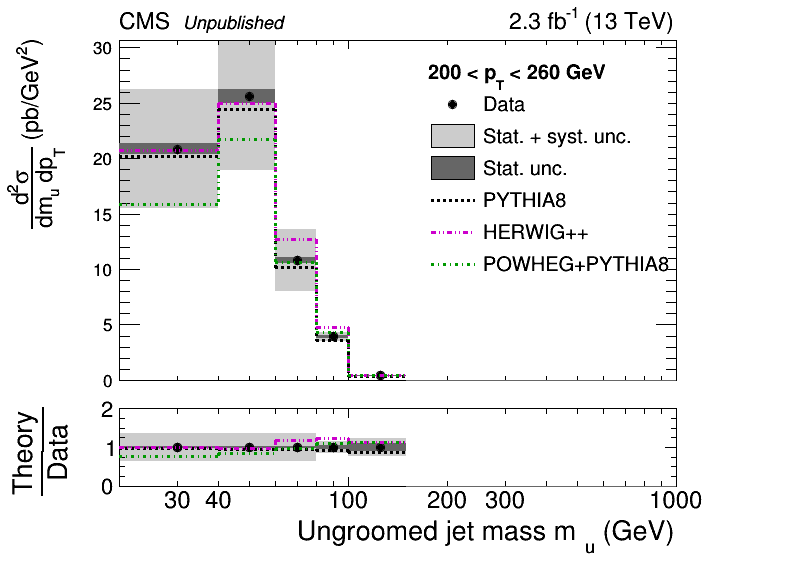

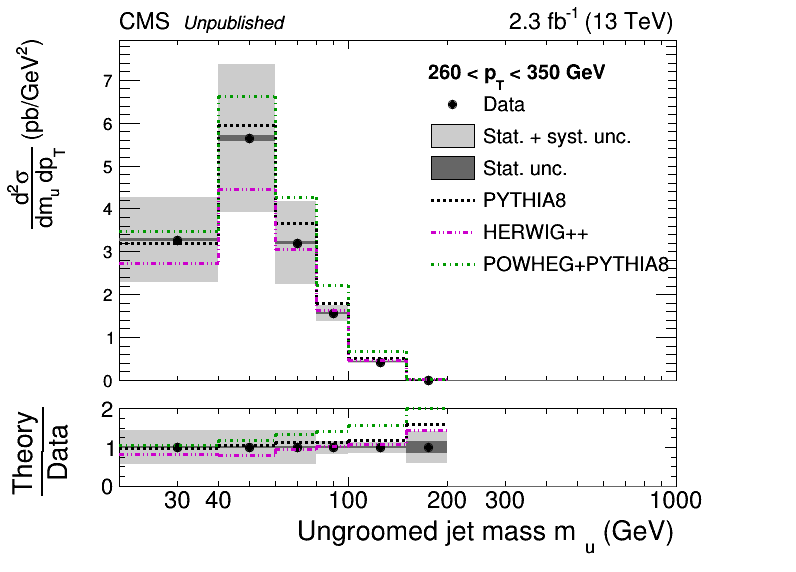

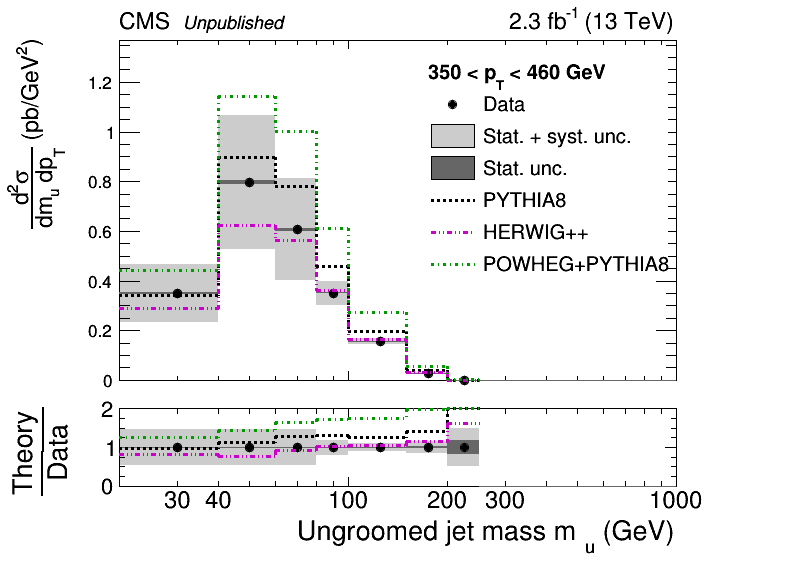

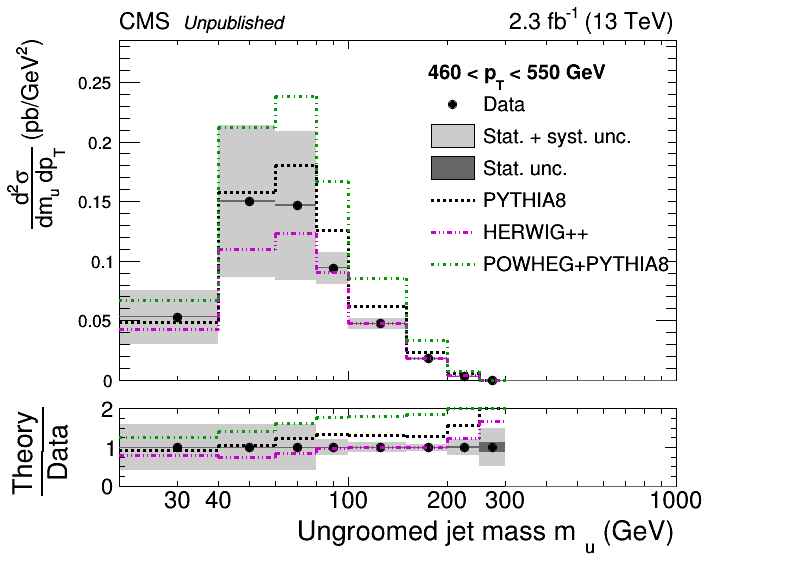

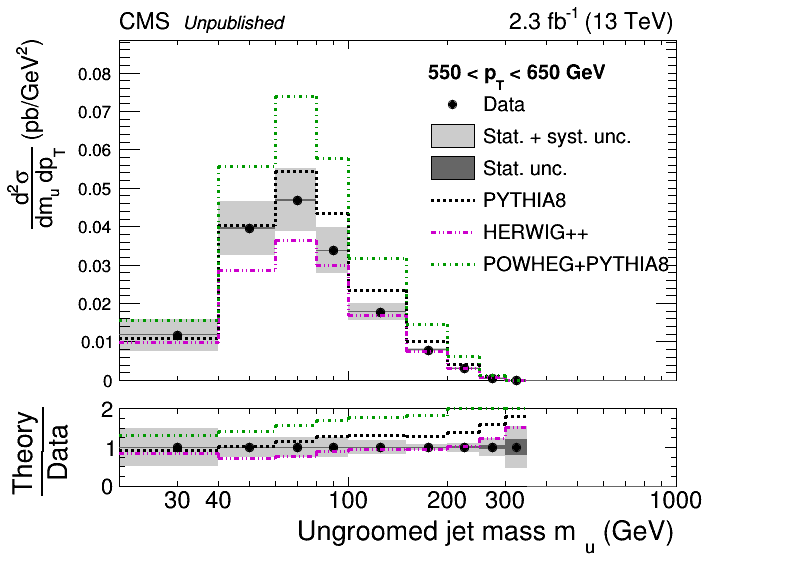

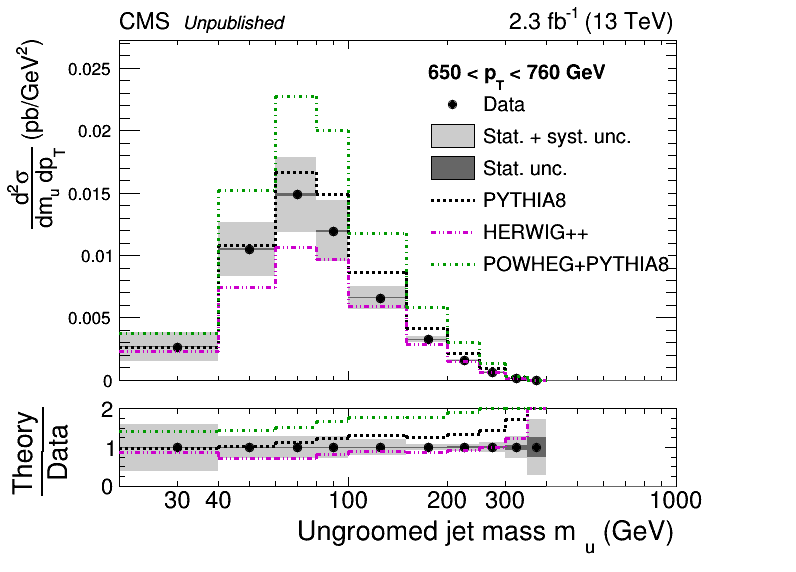

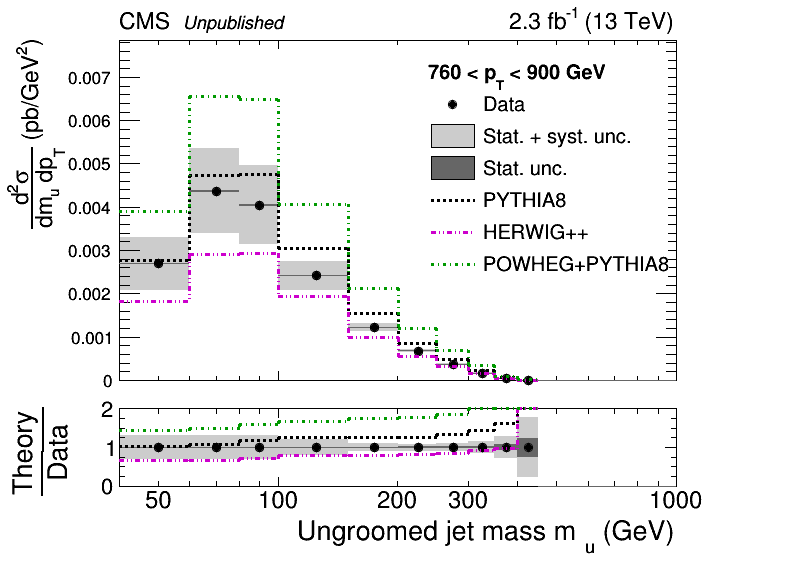

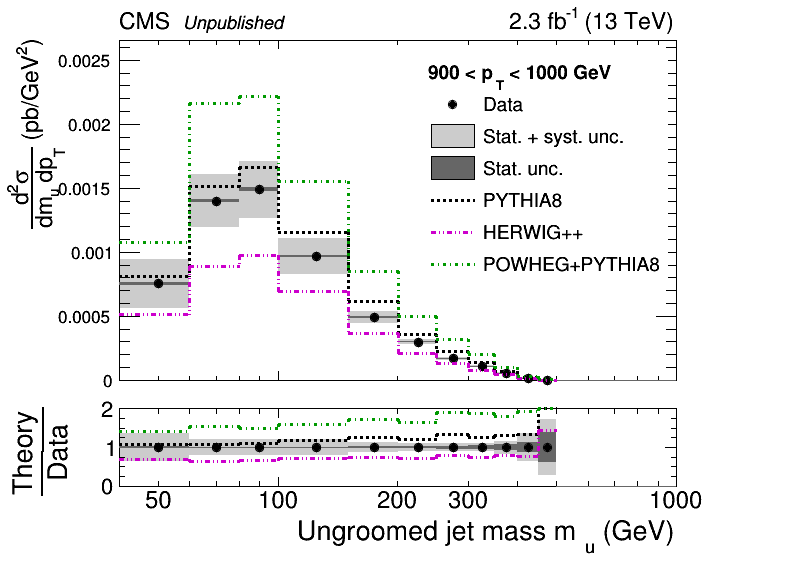

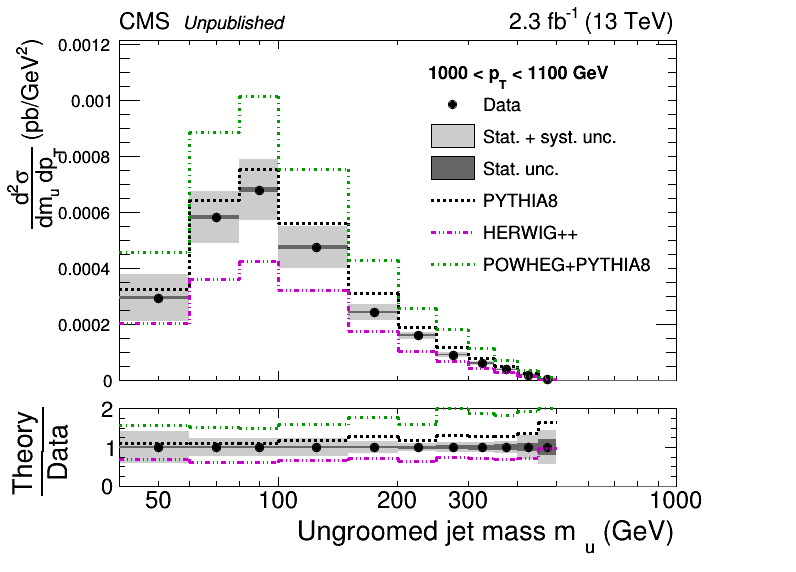

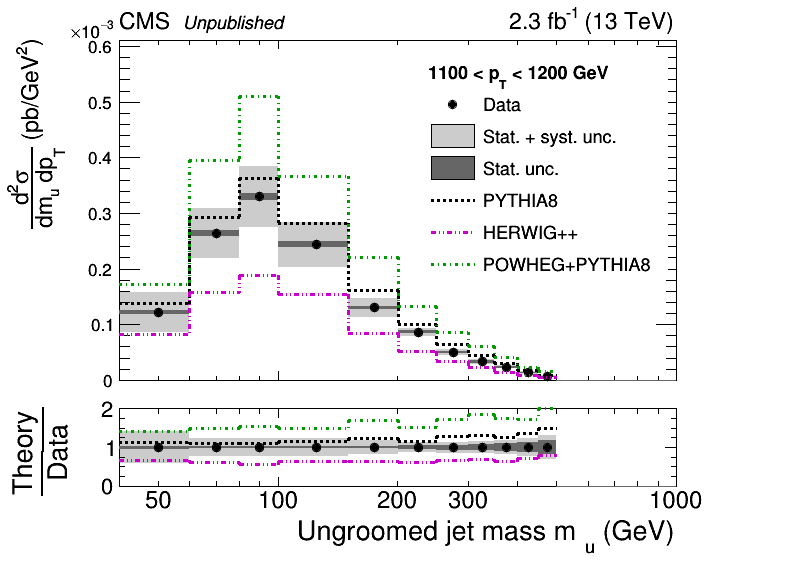

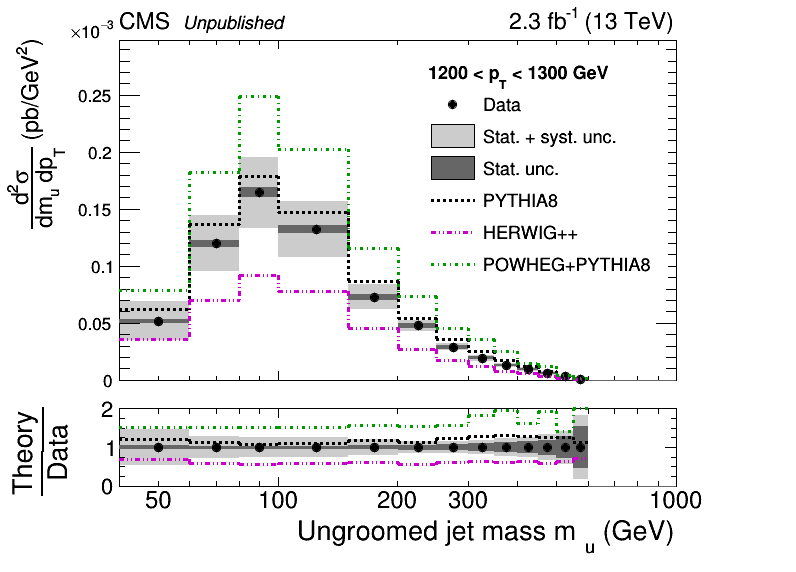

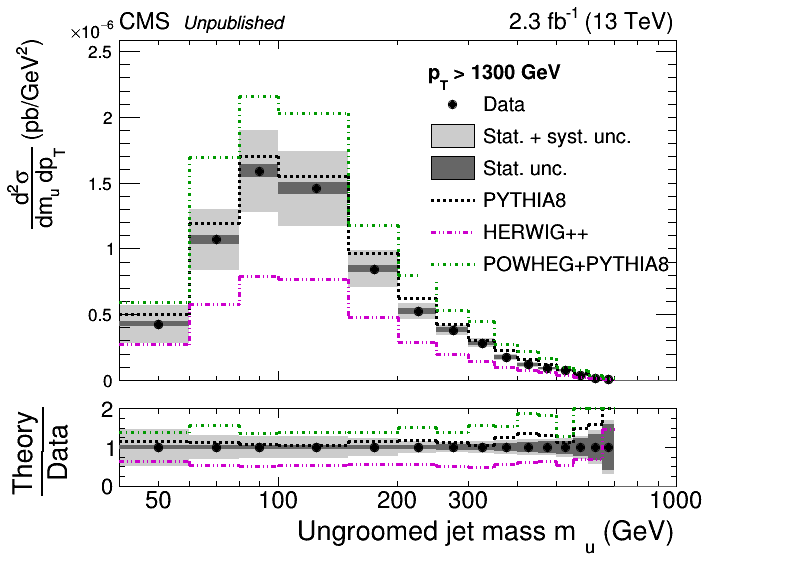

In [3]:
uu = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute") 

print 'data integral:' , uu.nom.Integral() 
print 'pythia integral:' , uu.pythiaHist.Integral()
print 'herwig integral:' , uu.herwigHist.Integral() 

uu.plotFullXSProjections( hists=[uu.nom, uu.nomStat,uu.pythiaHist,uu.herwigHist,uu.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )




#### Absolute cross section for groomed jets. 

{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7fdbacf93e00>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7fdbb099ac00>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7fdbb0839400>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7fdba8723e00>, '_pu': <ROOT.TH2F object ("2d_response_softdrop_jernom__pu") at 0x7fdbae4bfe00>, '_mcStat': <ROOT.TH2F object ("2d_response_softdrop_nomnom_mcStat") at 0x7fdbae63da00>, '_jer': <ROOT.TH2F object ("2d_response_softdrop_jernom__jer") at 0x7fdba8725a00>, '_ps': <ROOT.TH2F object ("2d_response_softdrop_nomnom_ps") at 0x7fdbae636200>, '_lum': <ROOT.TH2F object ("2d_response_softdrop_nomnom_lum") at 0x7fdbaf34c400>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_absolute_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop1.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop2.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop3.root has been created
Info in <TCanvas::Print>: png file fullxs_absolute_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_absolute_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_absolute_softdrop4.root has been created
Info

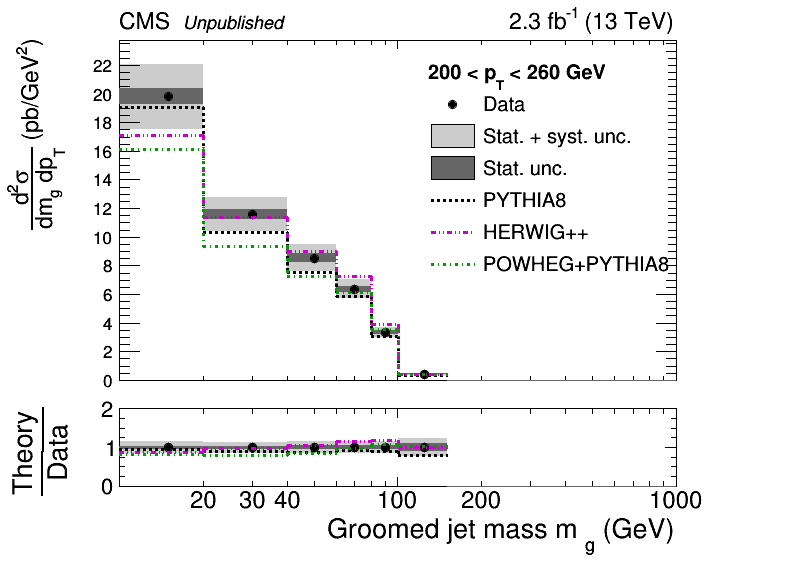

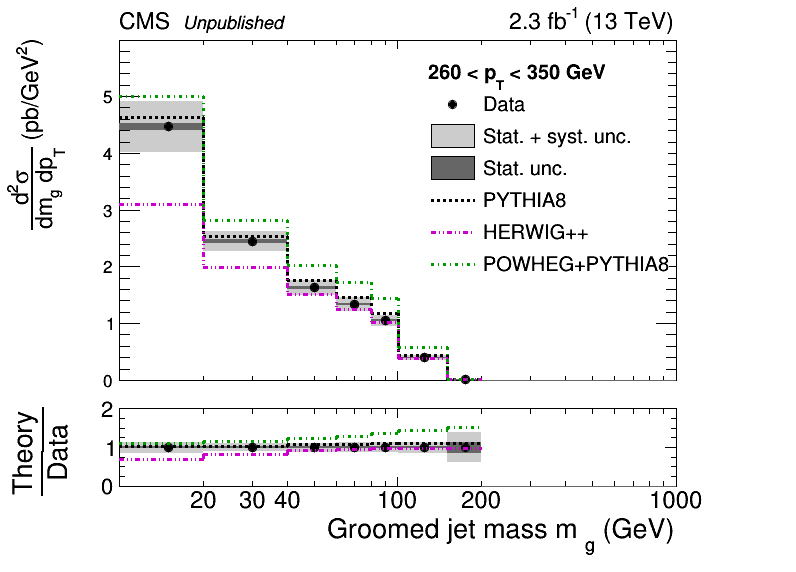

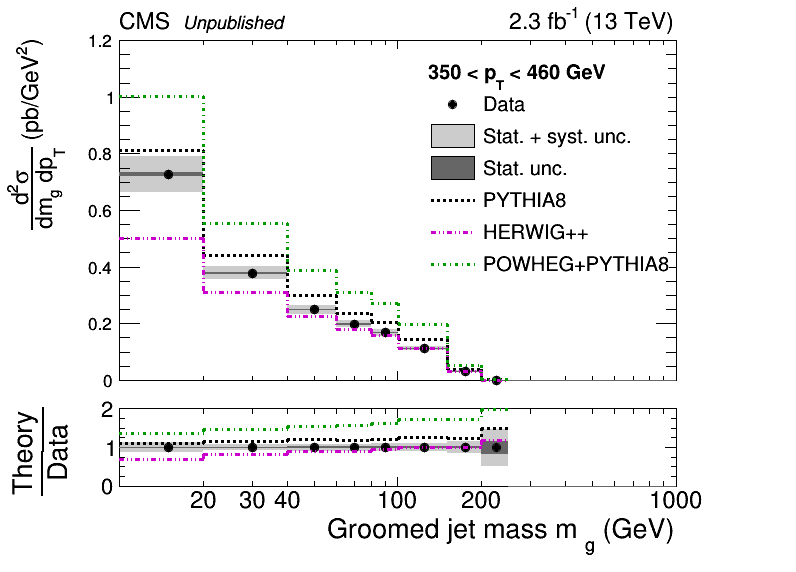

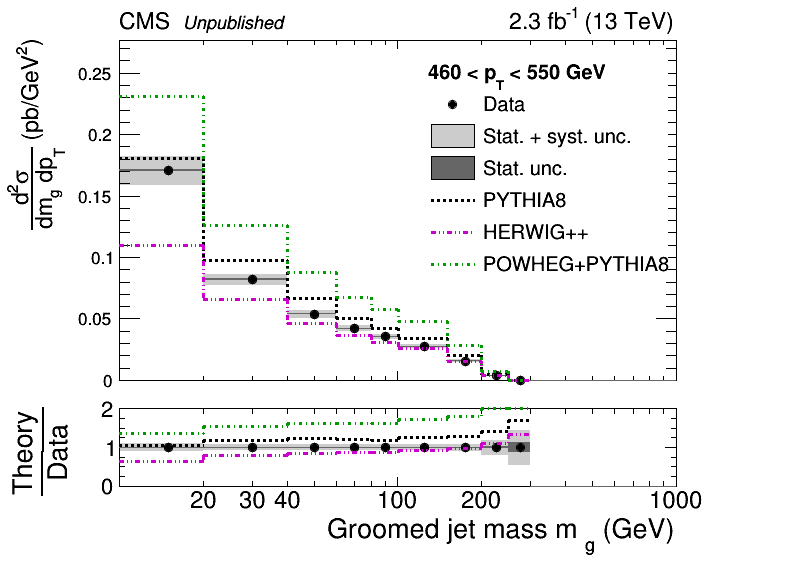

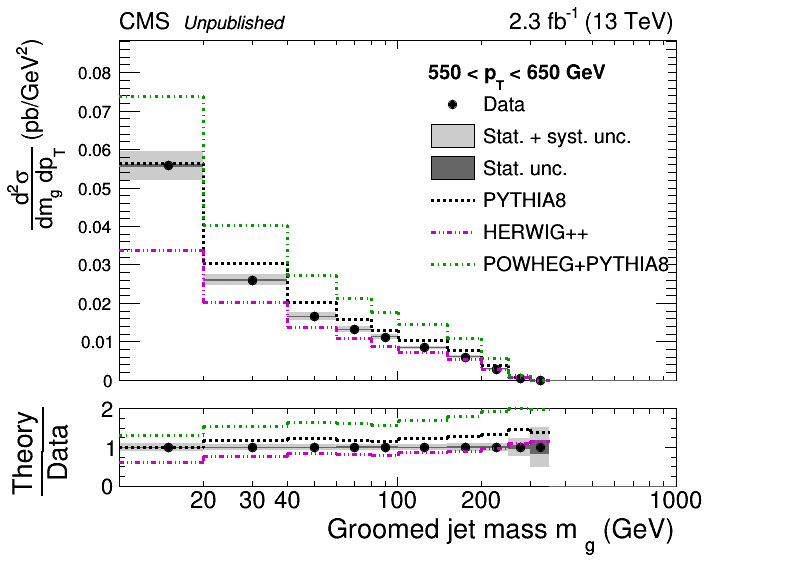

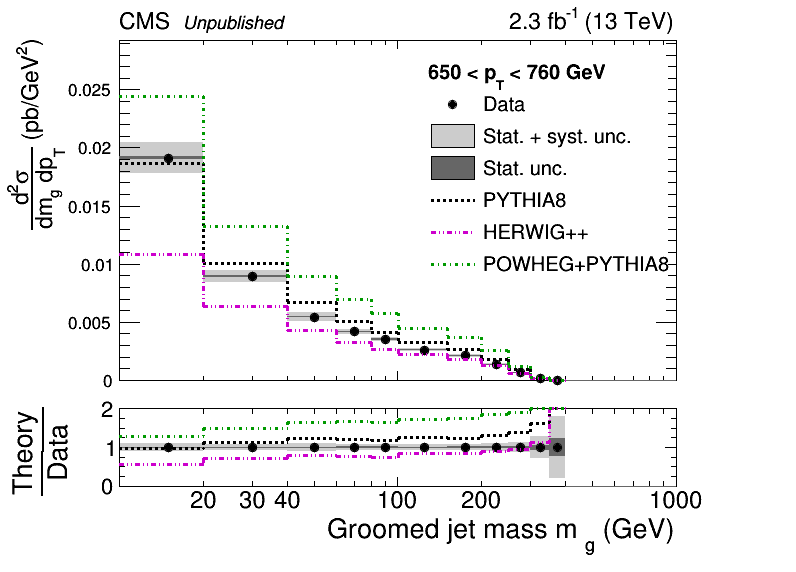

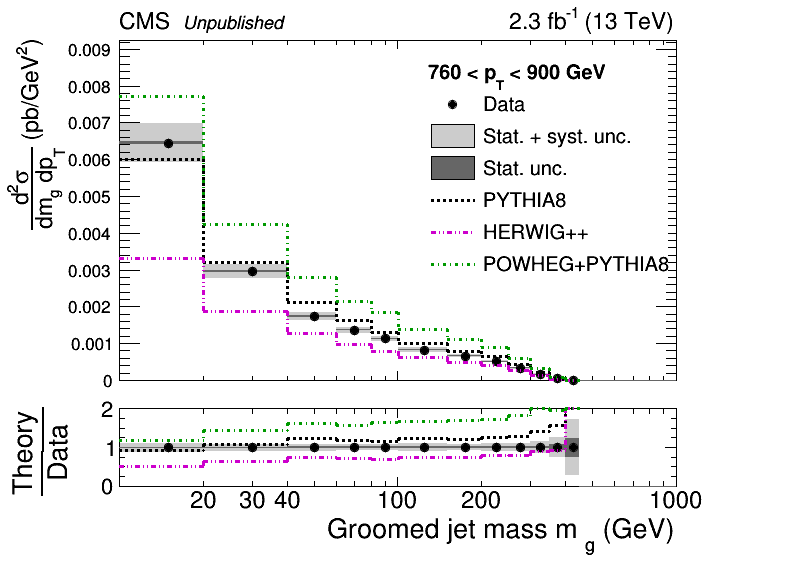

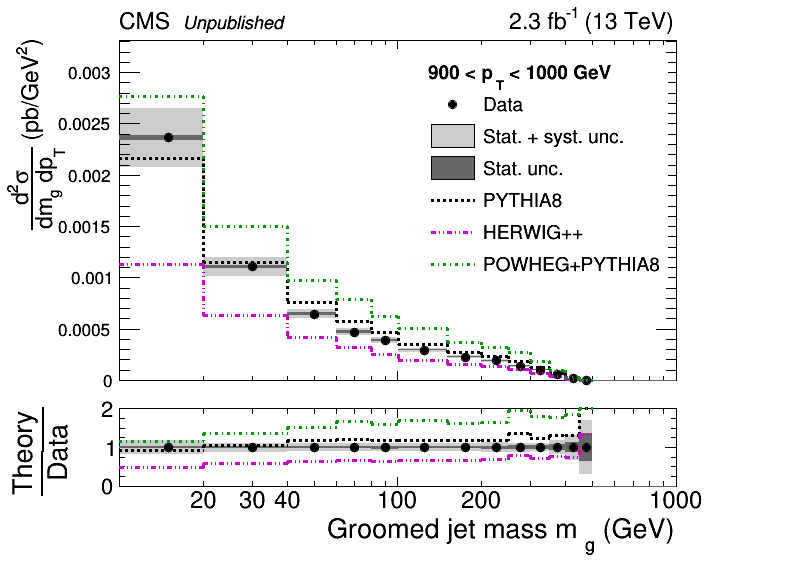

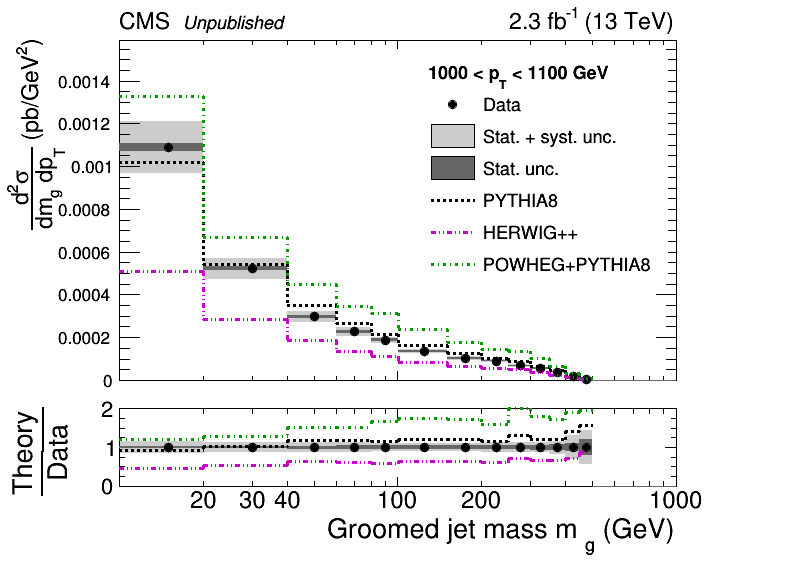

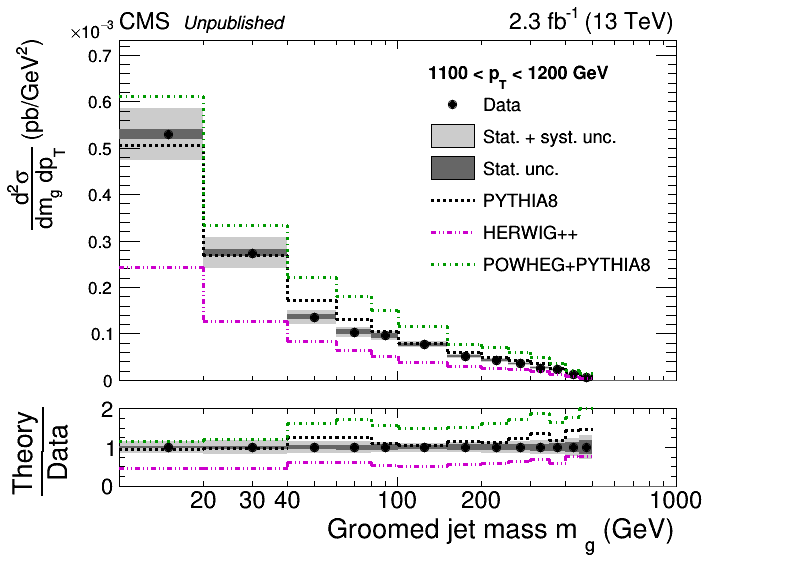

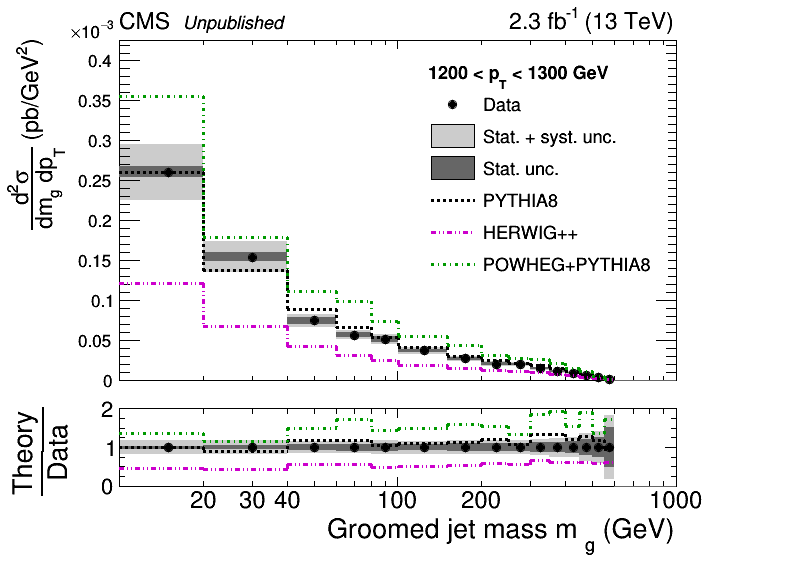

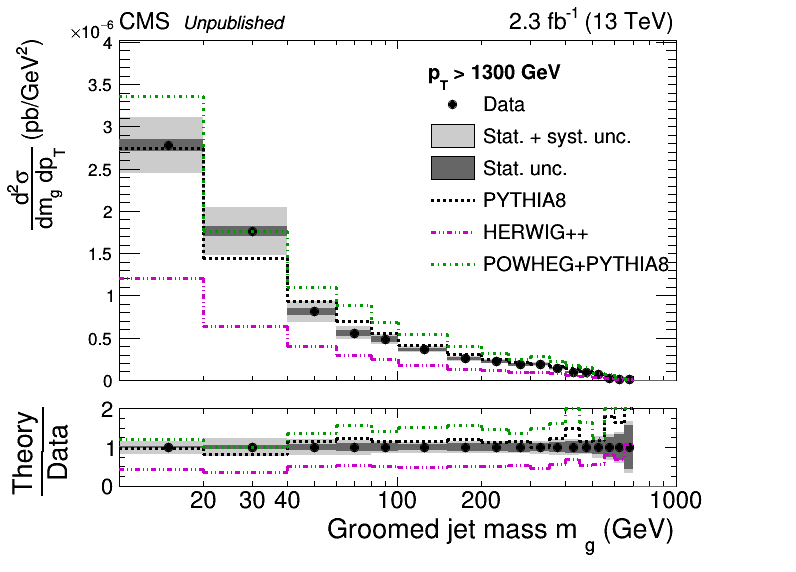

In [4]:

ug = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi,
                       postfix="absolute_softdrop") 

ug.plotFullXSProjections( hists=[ug.nom, ug.nomStat,ug.pythiaHist,ug.herwigHist,ug.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )


#### Absolute cross section wrt pt

Info in <TCanvas::Print>: png file pt_xs.png has been created
Info in <TCanvas::Print>: pdf file pt_xs.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file pt_xs.root has been created


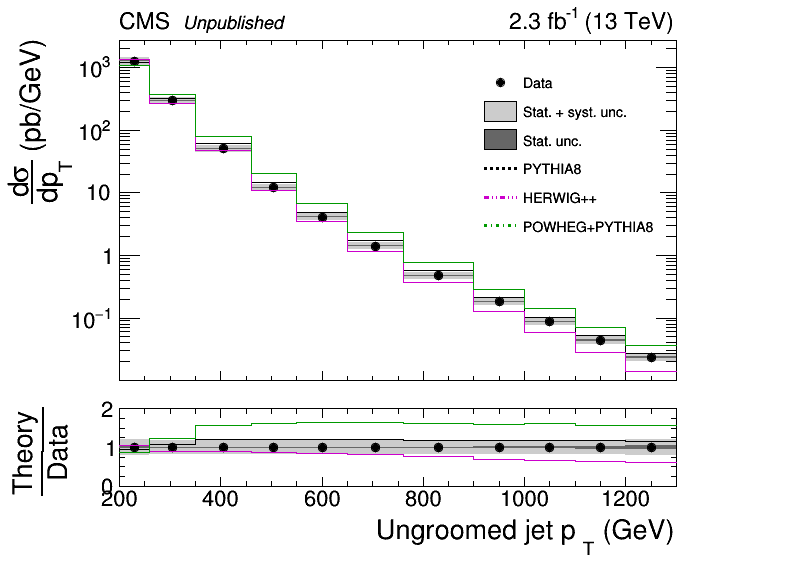

In [5]:
uu.plotPtDist( hists=[uu.nom, uu.nomStat, uu.pythiaHist, uu.herwigHist, uu.powhegHist],
                   styleNames=['nom','nomStat','pythia','herwig', 'powheg'],
                   filename = "pt_xs", title=";Ungroomed jet p_{T} (GeV);#frac{d#sigma}{dp_{T}} (pb/GeV)" )






#### Then plot uncertainties


{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7fdbb0a10200>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7fdbb02cd600>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7fdbae638a00>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7fdbb0a44400>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7fdbb0180400>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7fdbaf57f200>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7fdbaf1bd200>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7fdbb02cdc00>, '_lum': <ROOT.TH2F object ("2d_response_nomnom_lum") at 0x7fdbb0291c00>, '_totunc': None}
{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7fdbb02e6800>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7fdbb0d94400>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7fdbaf5b2600>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7

Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute1.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute2.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed_absolute3.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed_absolute4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed_absolute4.pdf has been created
I

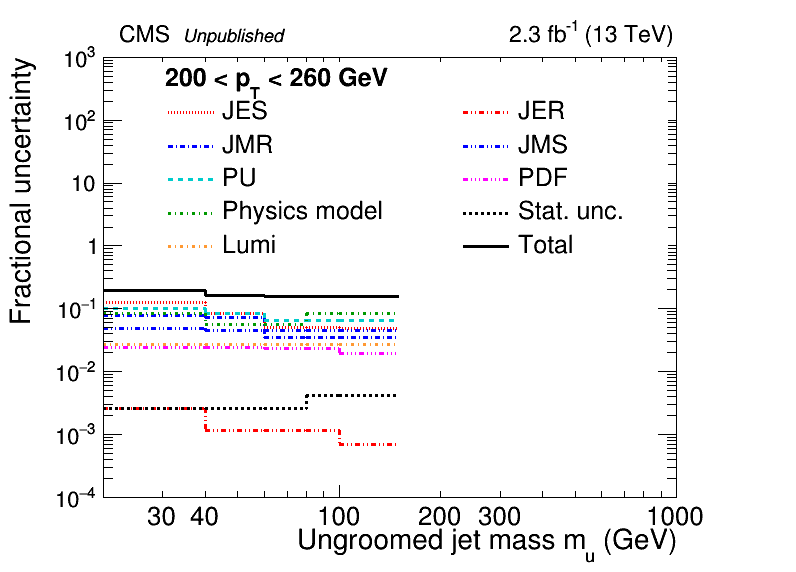

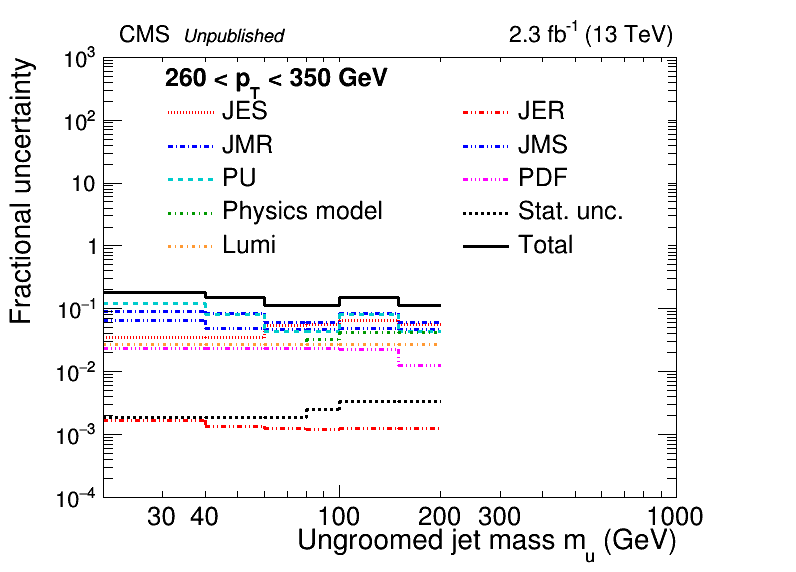

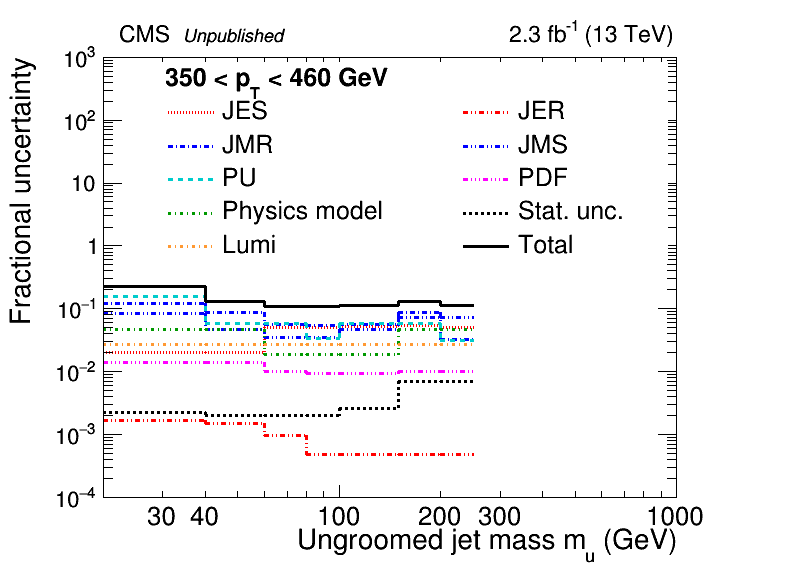

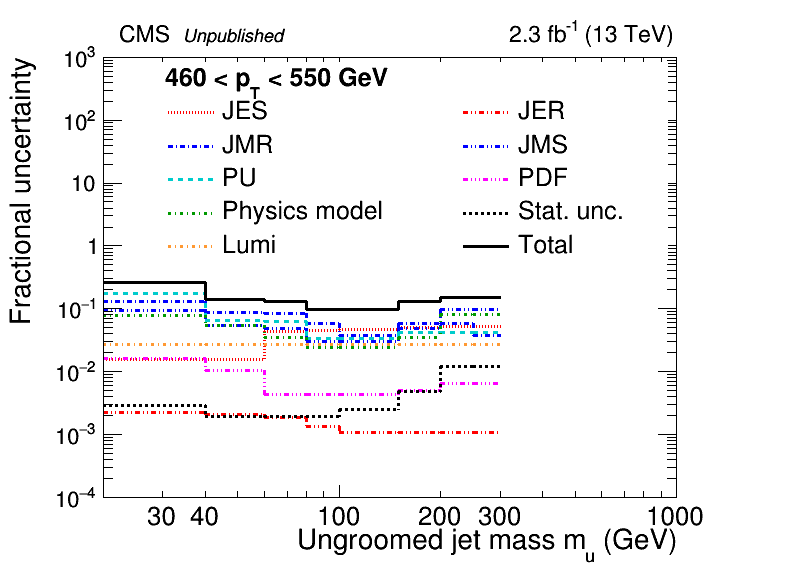

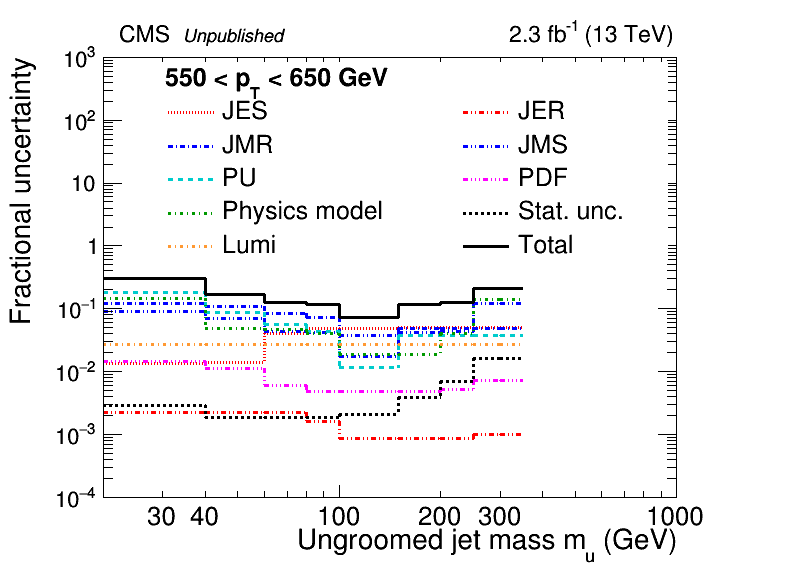

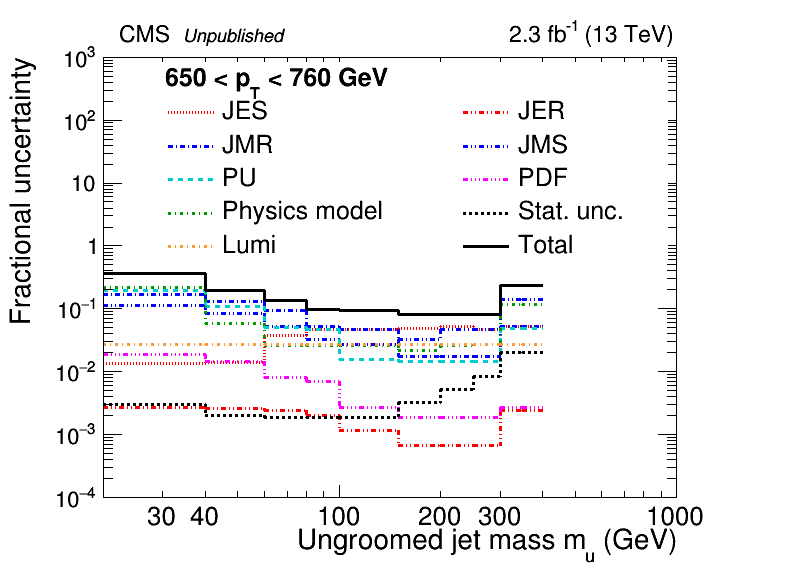

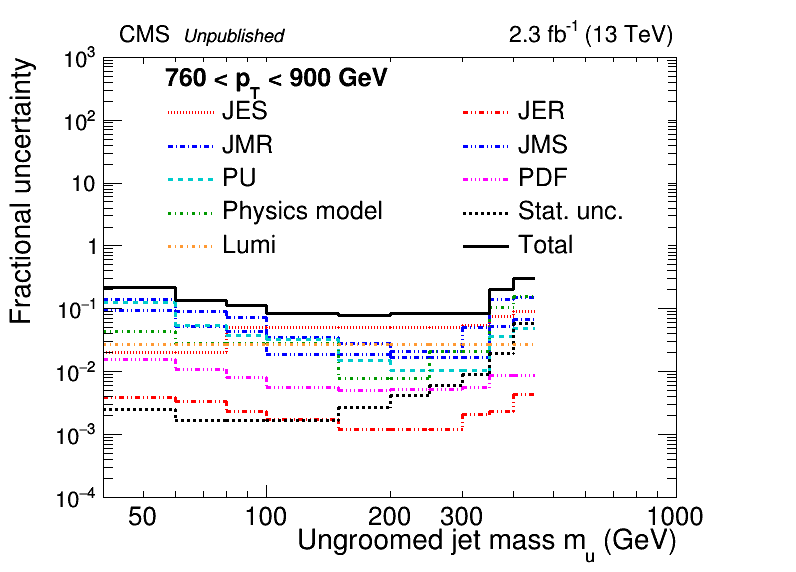

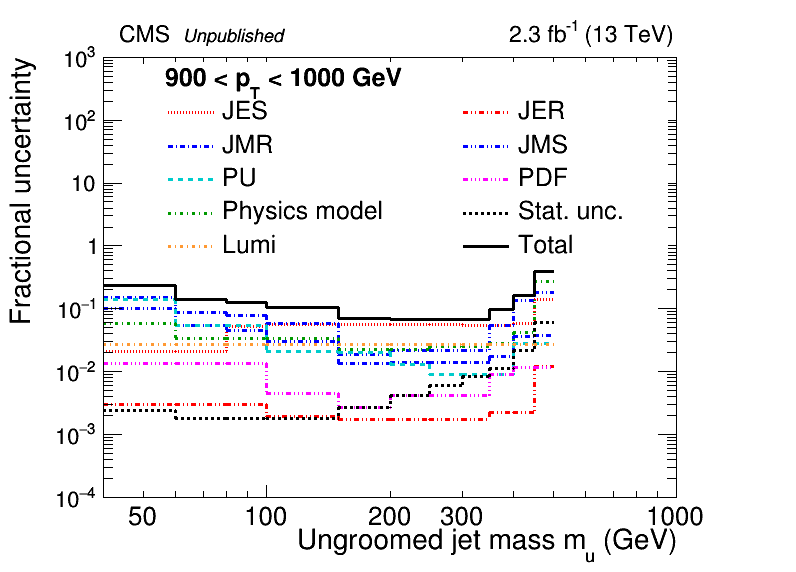

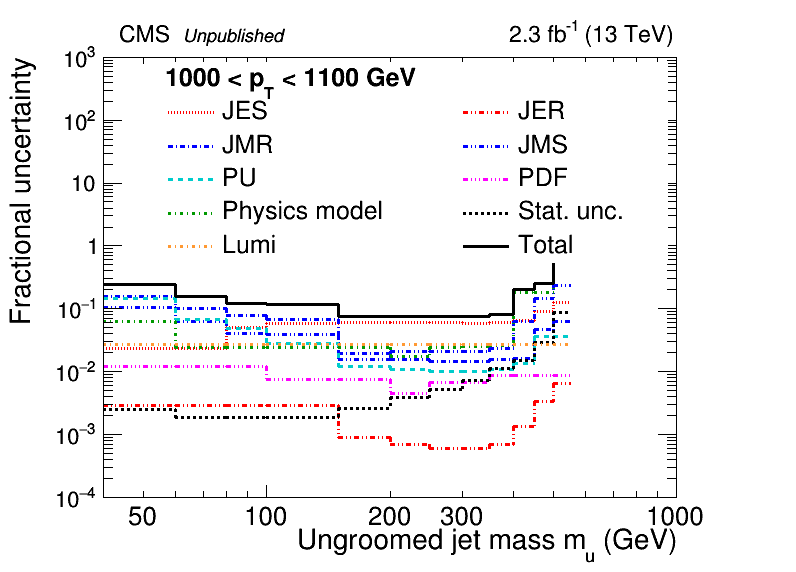

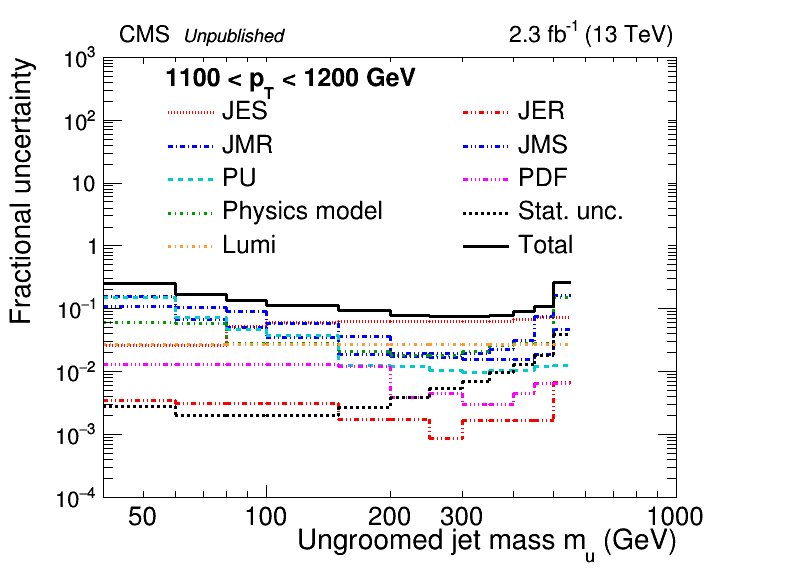

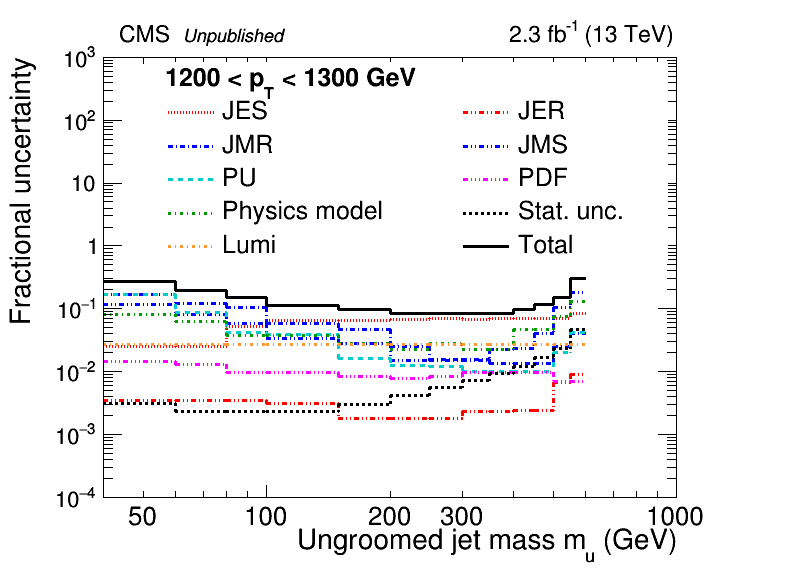

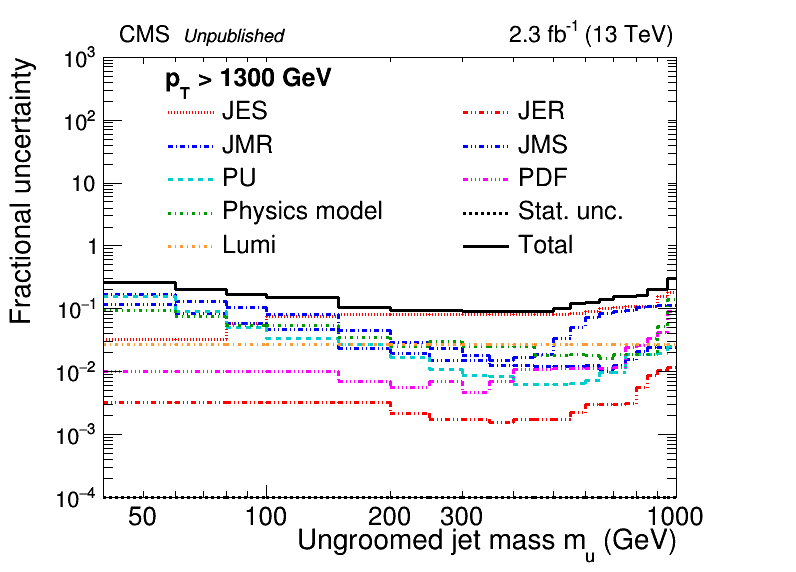

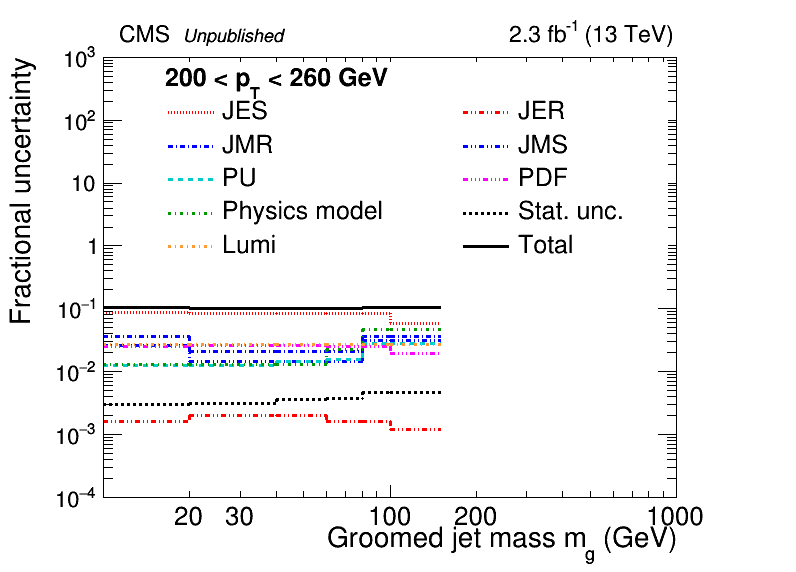

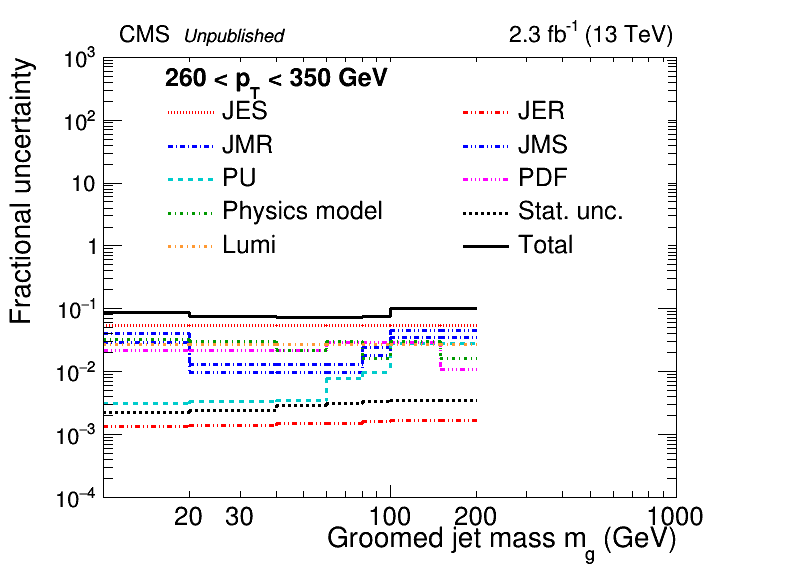

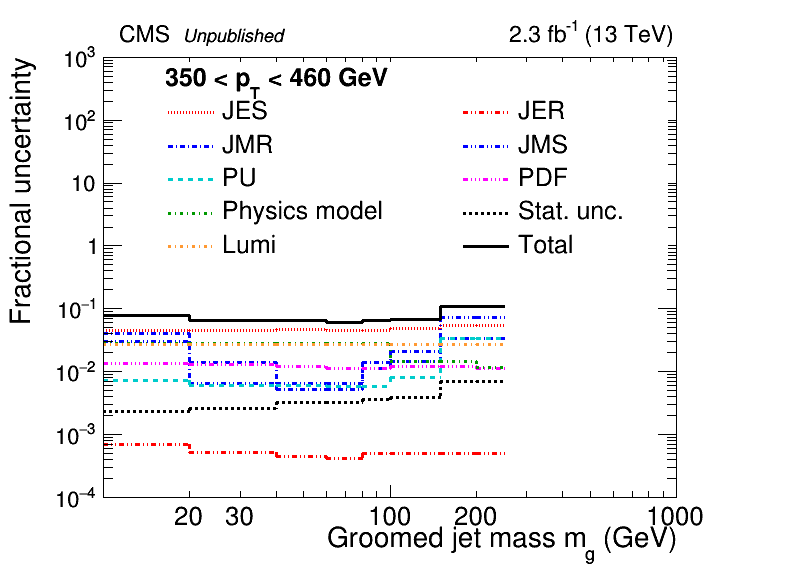

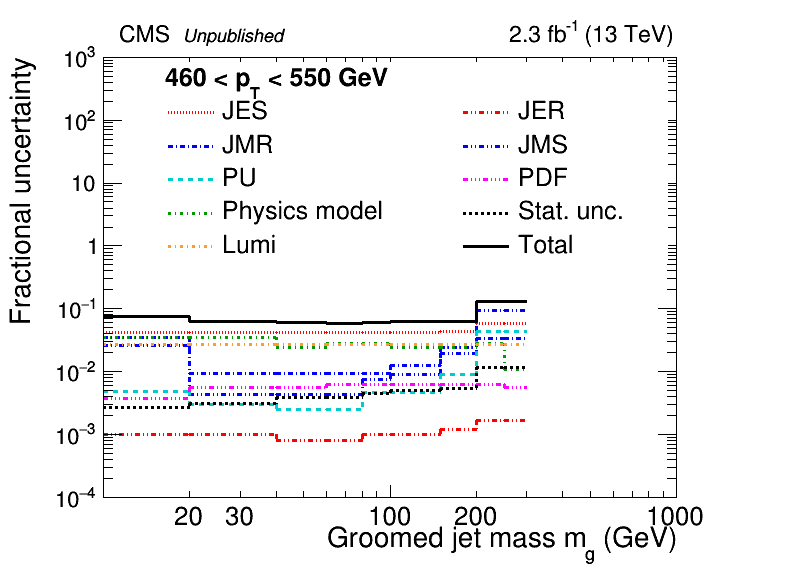

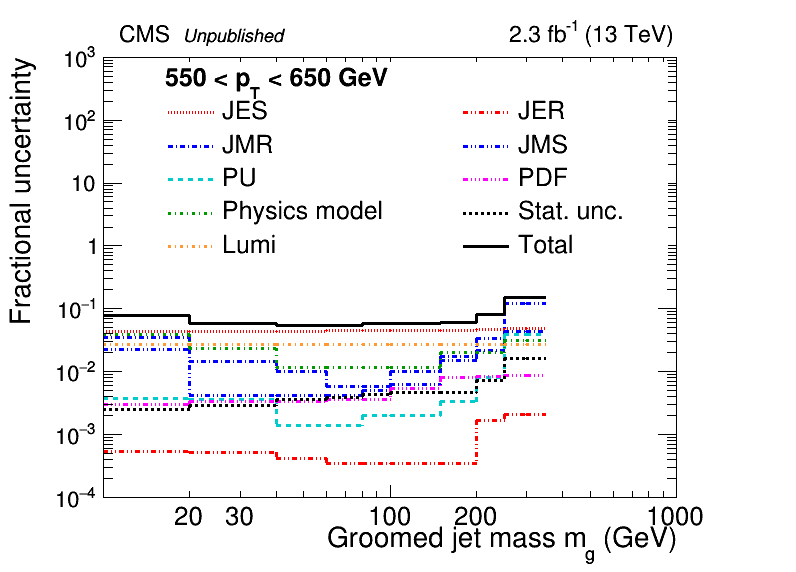

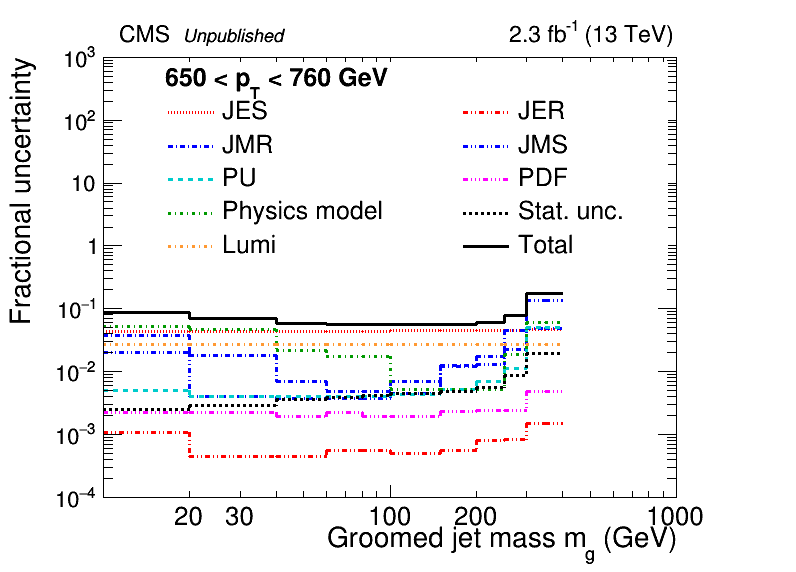

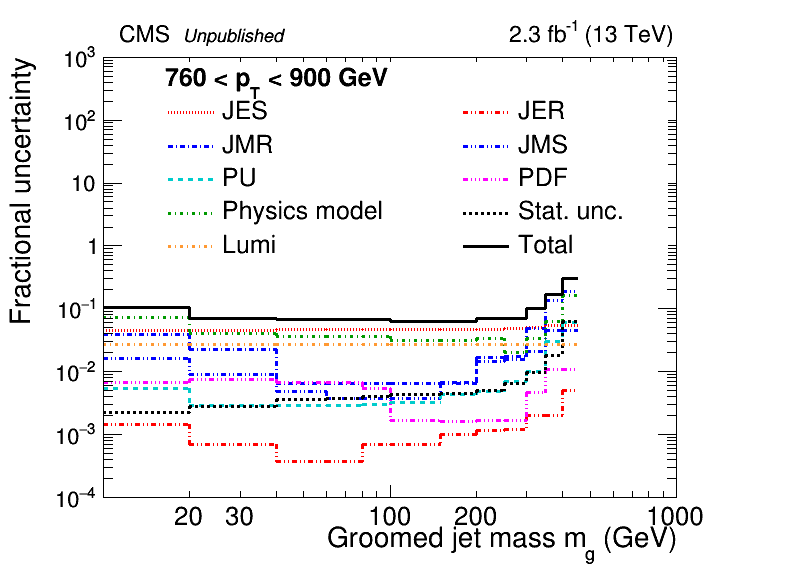

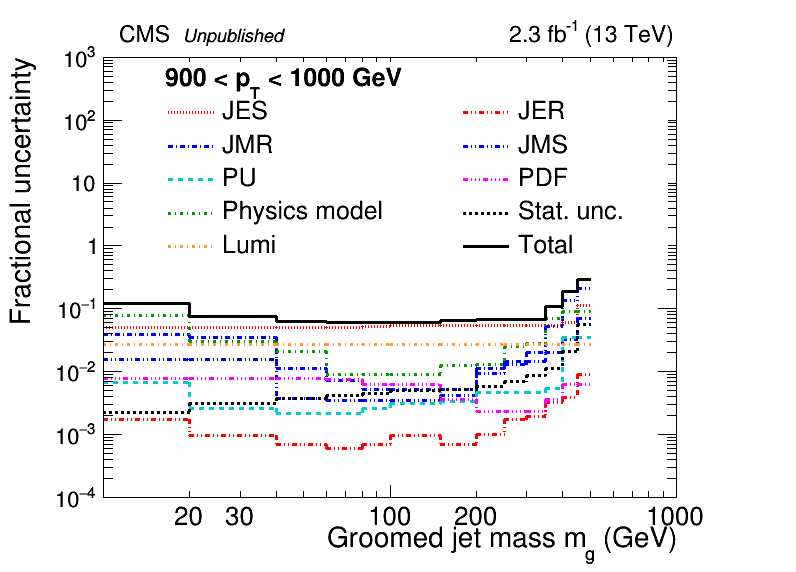

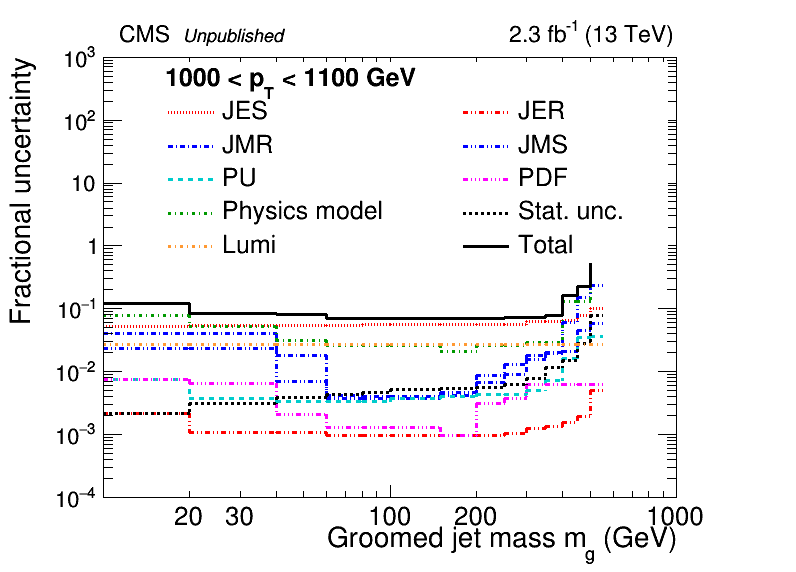

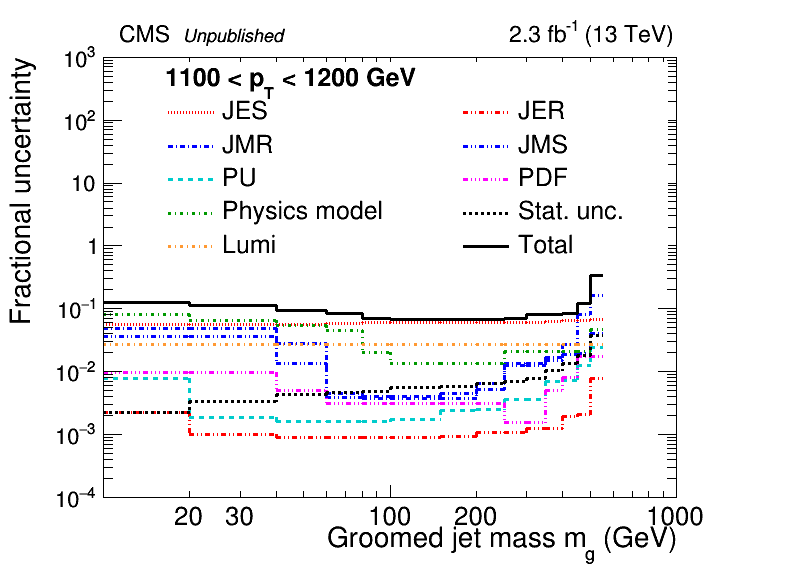

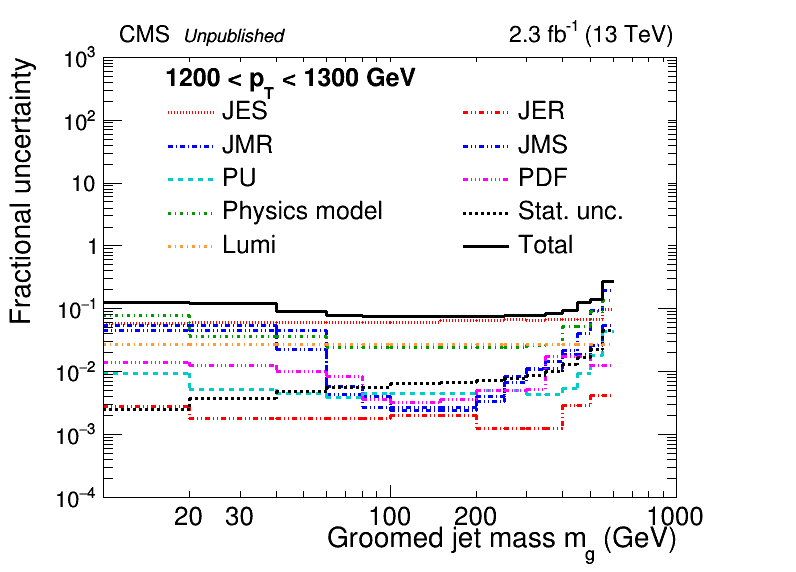

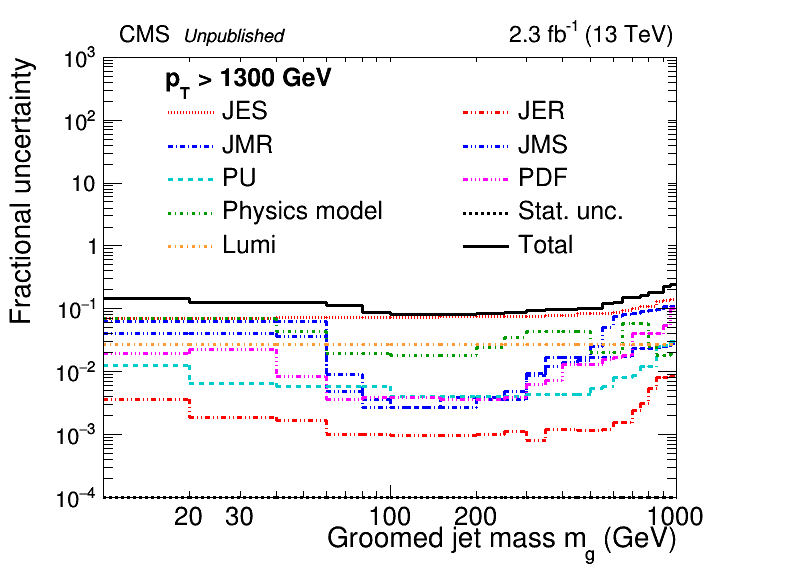

In [6]:
uumc = RooUnfoldUnfolder(useSoftDrop=False,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="ungroomed_absolute")
ugmc = RooUnfoldUnfolder(useSoftDrop=True,inputs='2DClosure',
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=False, scalePtBins=False, lumi=lumi, postfix="softdrop_absolute") 

uumc.plotFullUncs( hists=uumc.uncertainties )
ugmc.plotFullUncs( hists=ugmc.uncertainties )




#### Normalized cross section, ungroomed

{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7fdbb10e8000>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7fdbb123ee00>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7fdbb10f5600>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7fdbb0e05c00>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7fdbaf7b8200>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7fdbb1240000>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7fdbaf7b2400>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7fdbb0f6ba00>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_normalized1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized1.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized2.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized3.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized4.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized5.png has been created
Info in <TCan

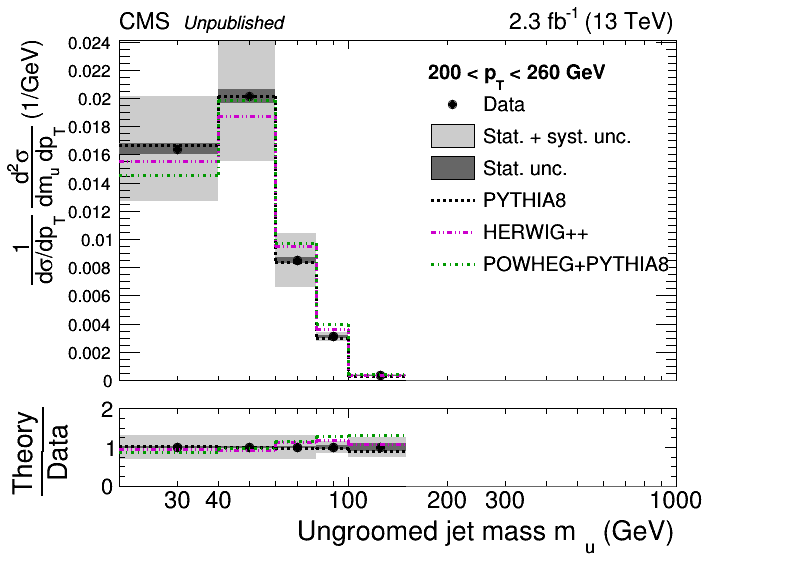

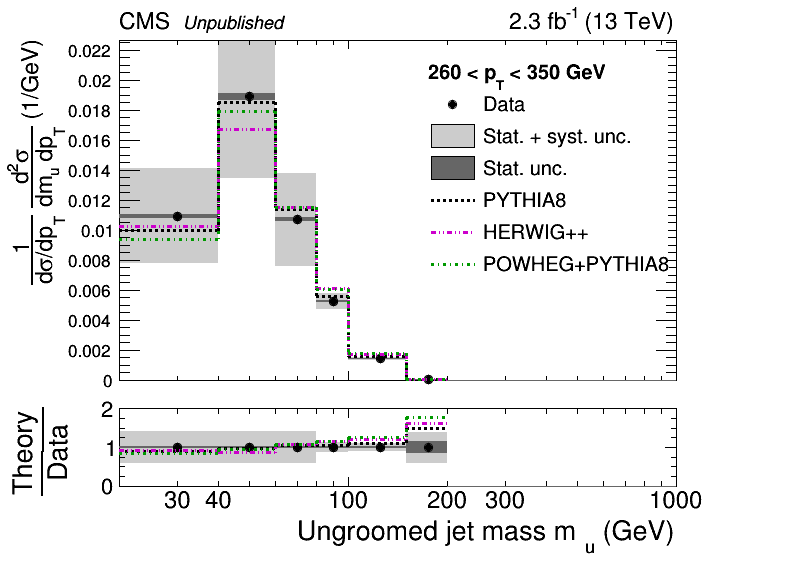

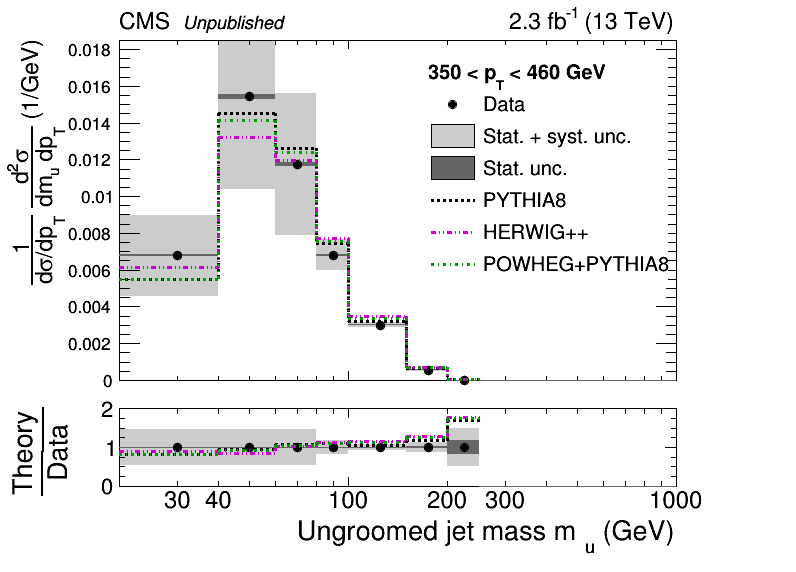

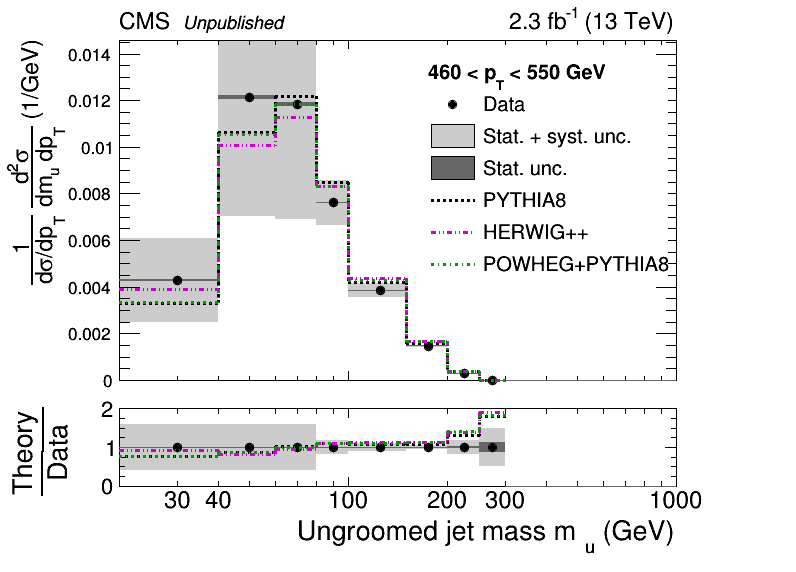

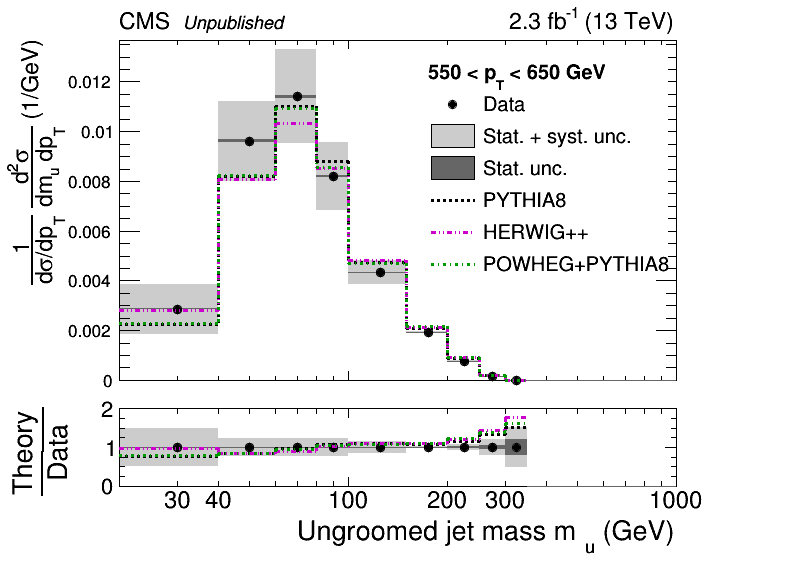

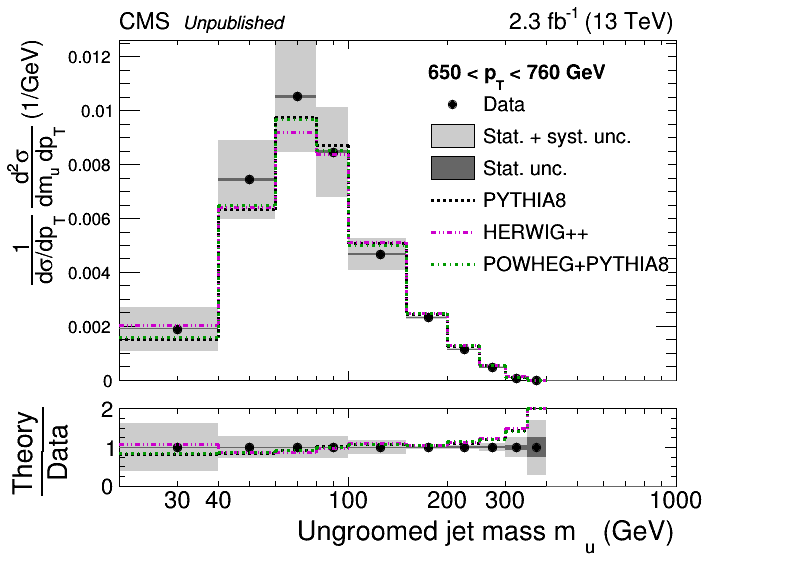

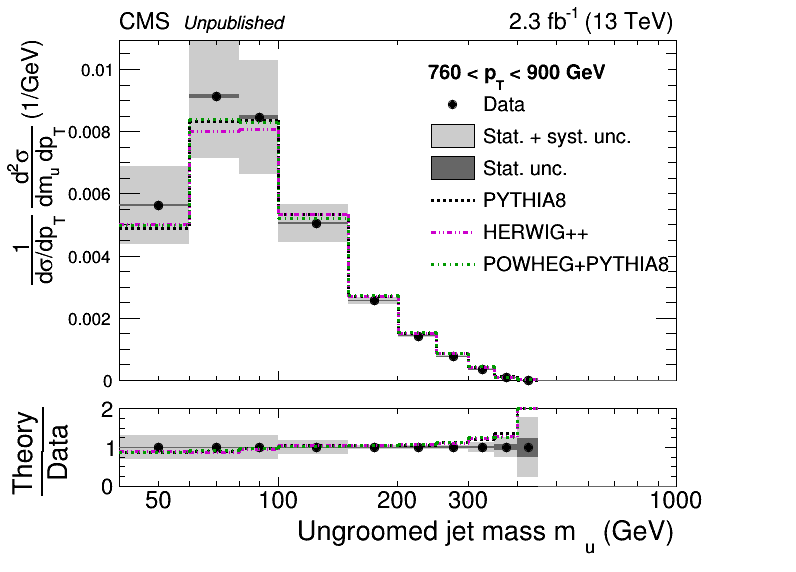

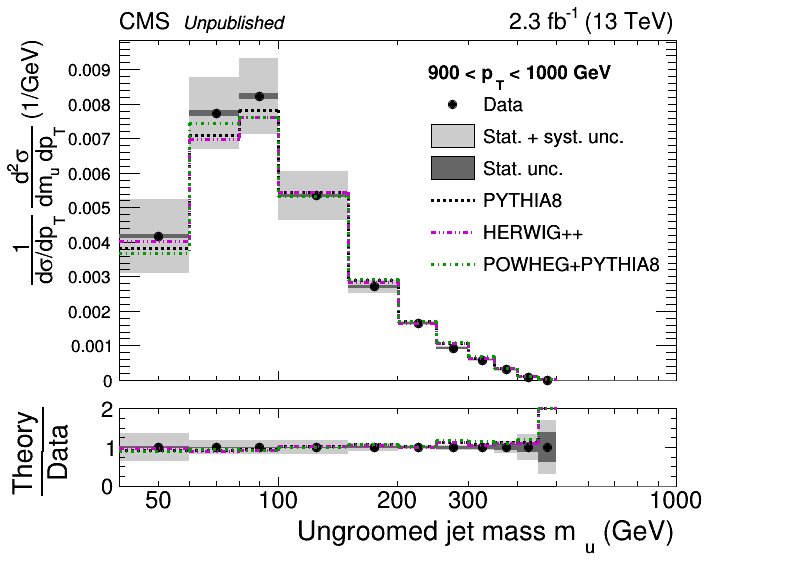

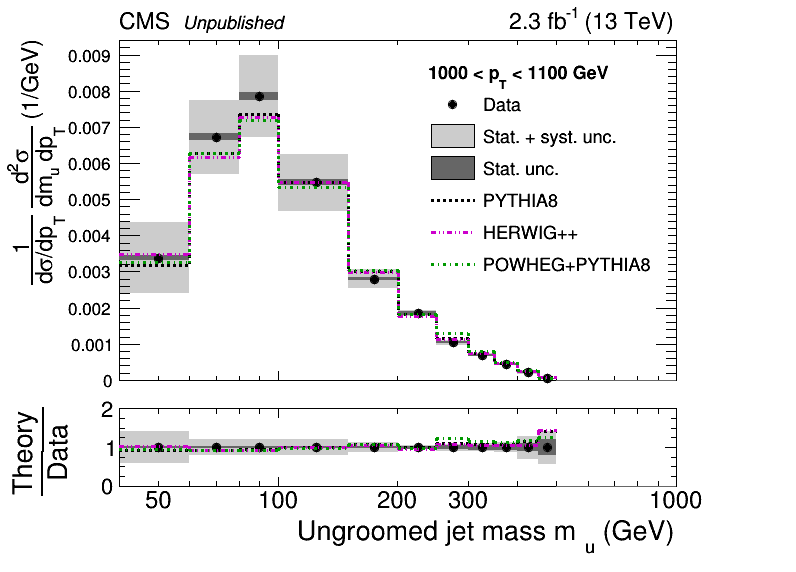

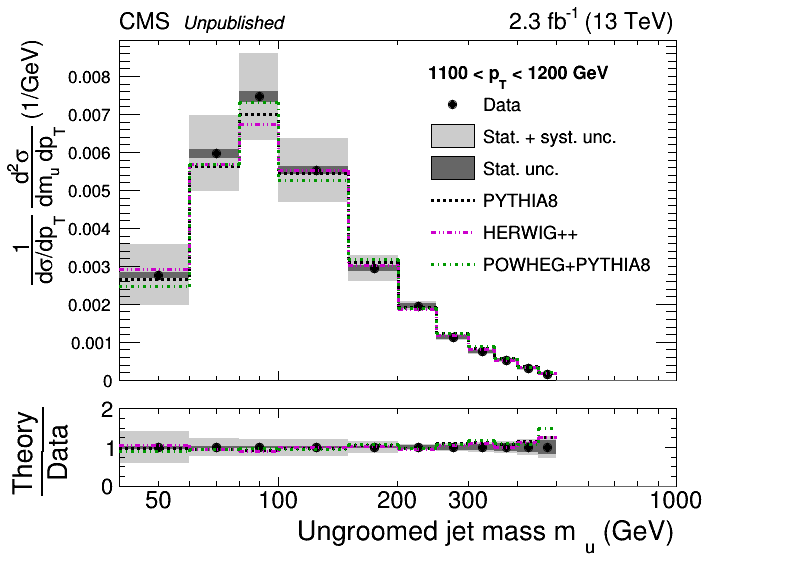

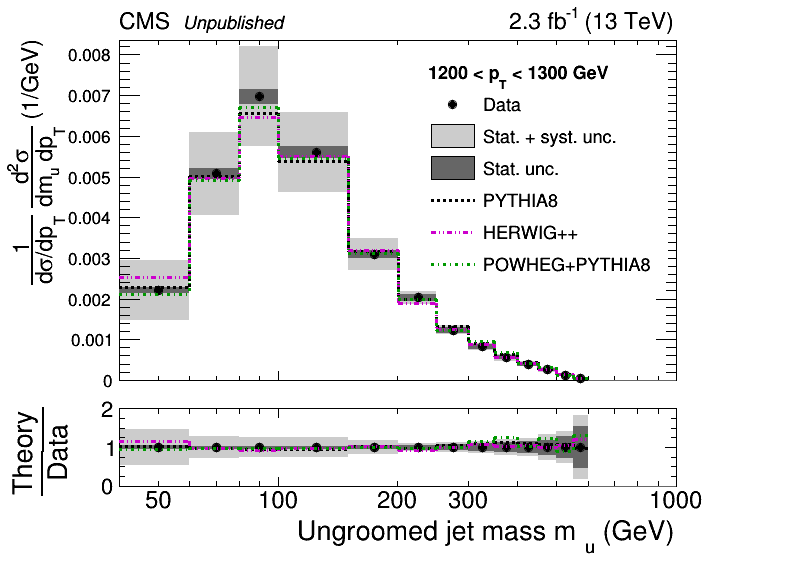

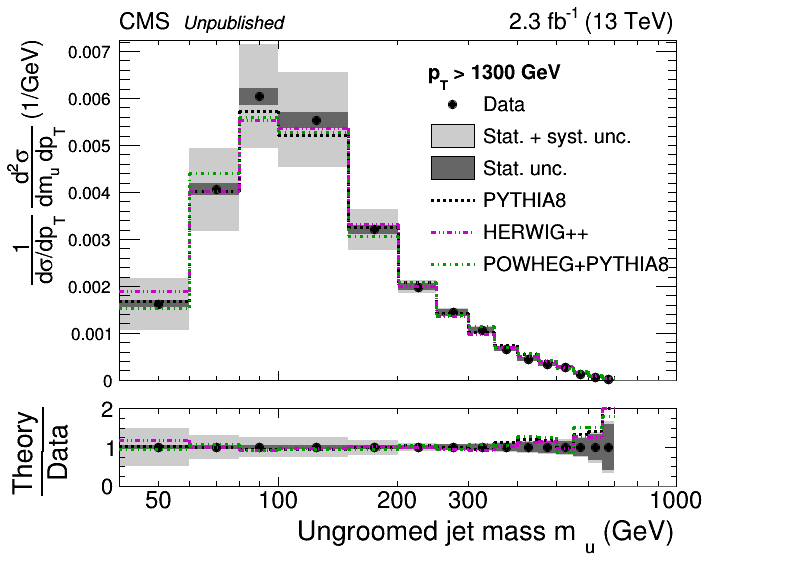

In [7]:
# Now normalized cross section
uu_norm = RooUnfoldUnfolder(useSoftDrop=False,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized")

uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist,uu_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'] )


Info in <TCanvas::Print>: png file fullxs_normalized1_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized1_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized1_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized2_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized2_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized2_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized3_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized3_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized3_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized4_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized4_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized4_

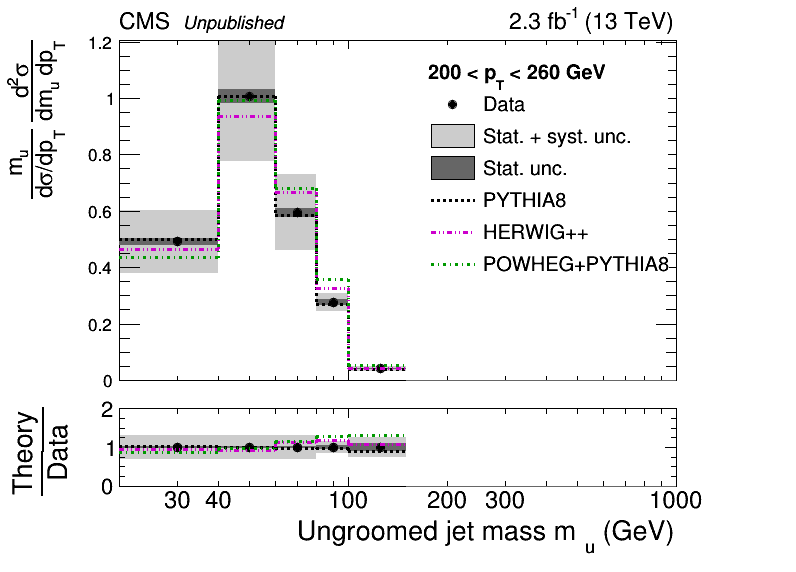

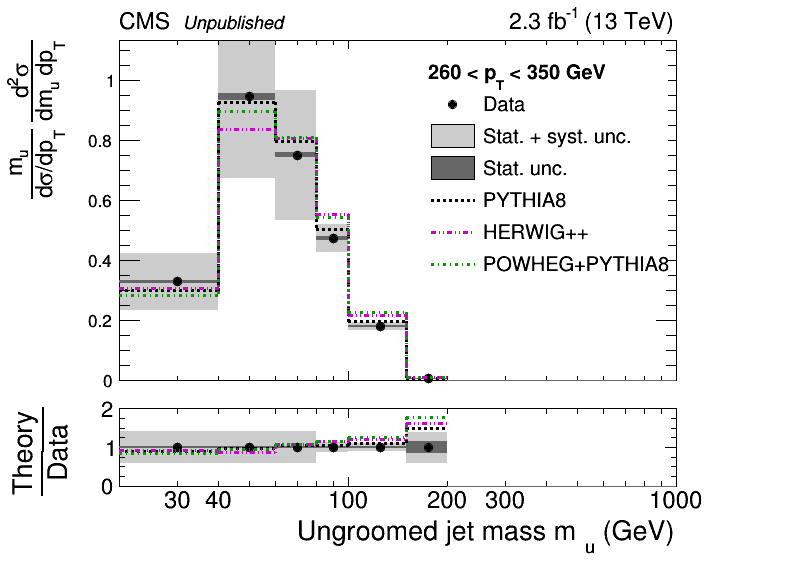

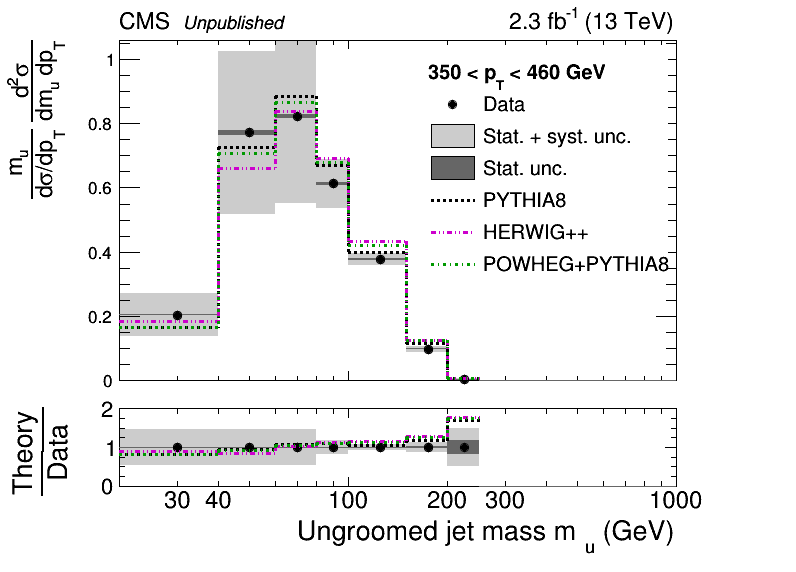

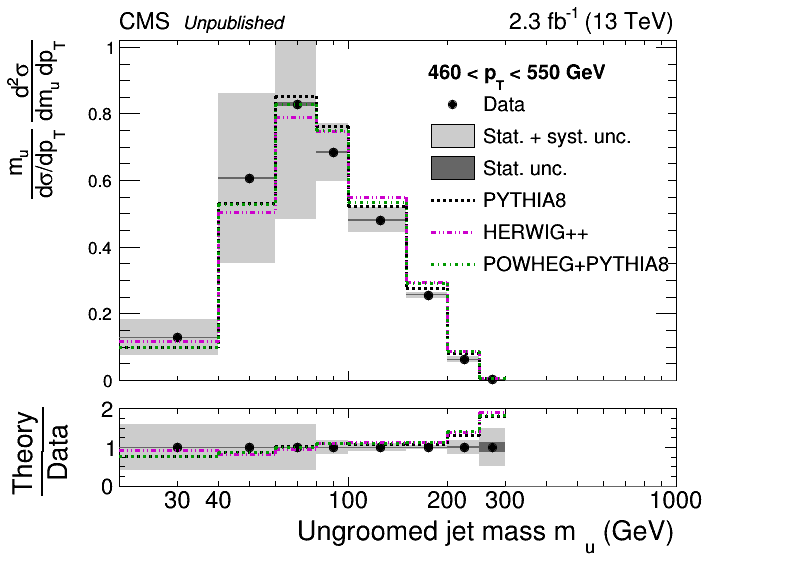

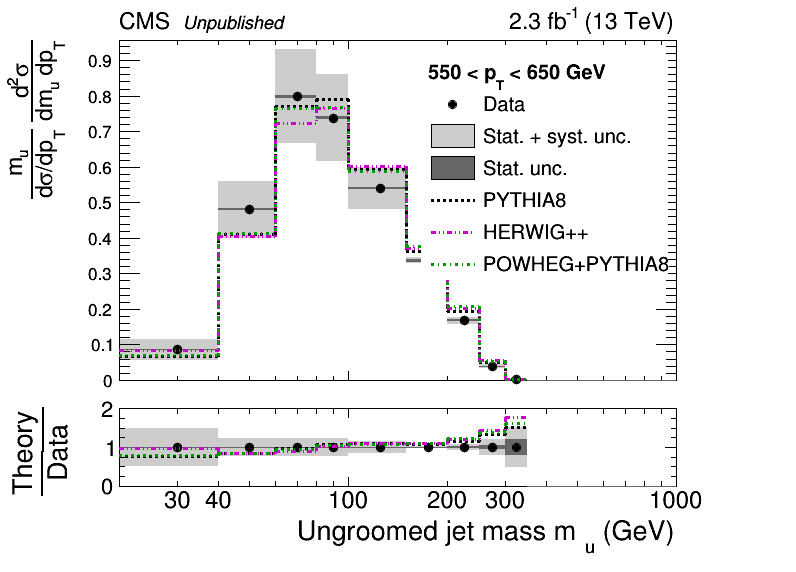

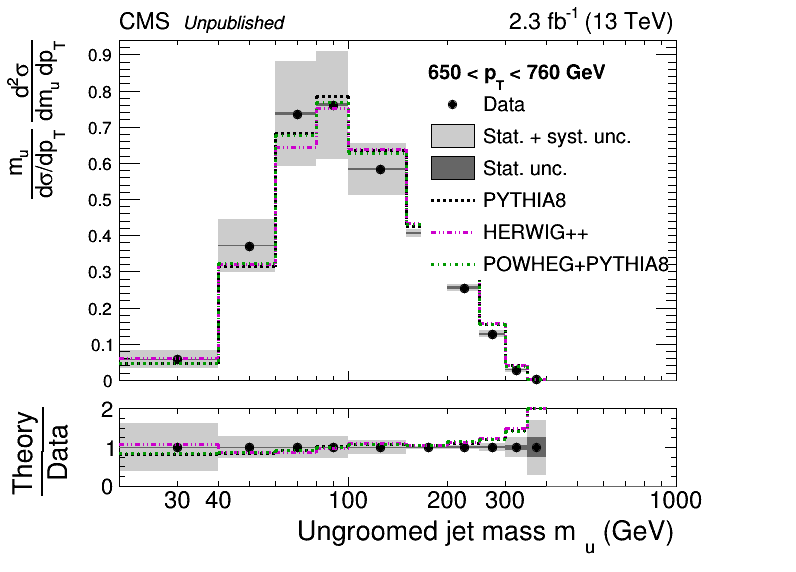

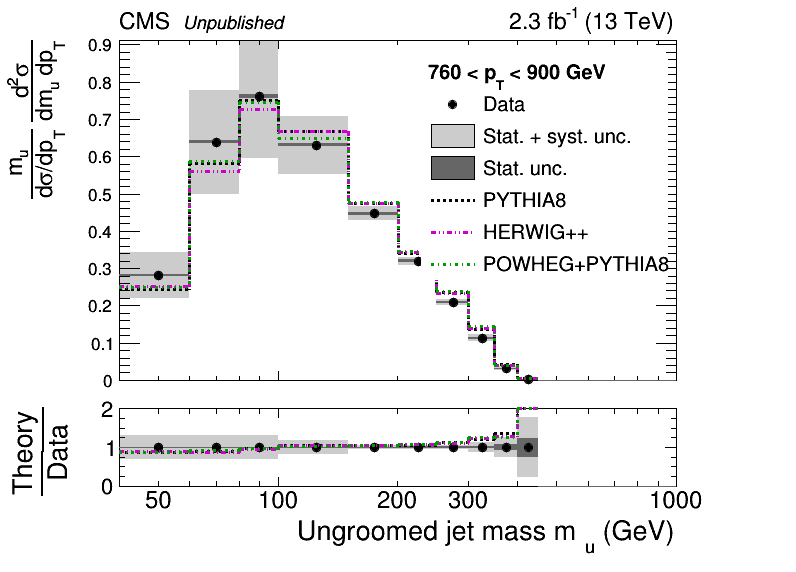

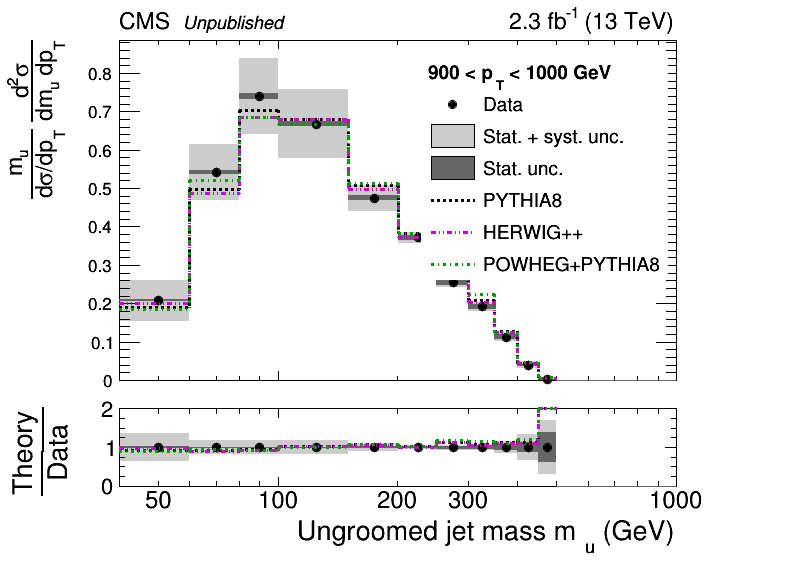

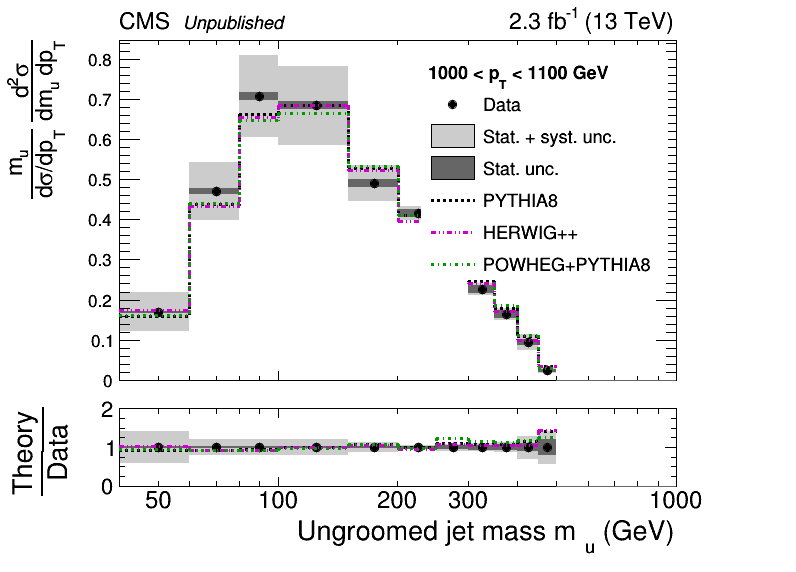

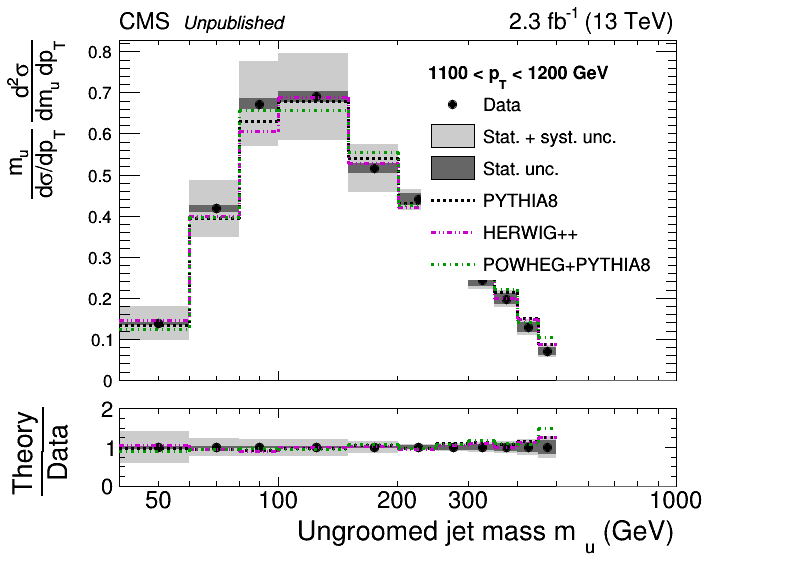

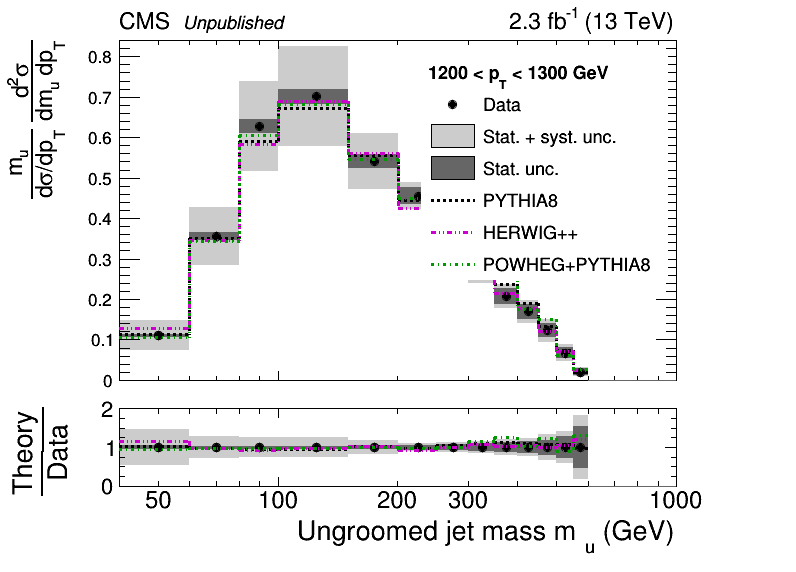

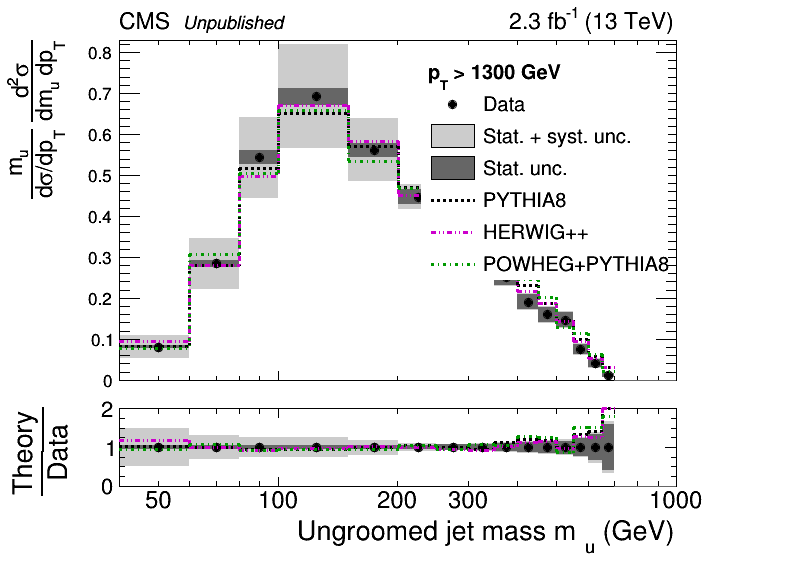

In [8]:
uu_norm.plotFullXSProjections( hists=[uu_norm.nom, uu_norm.nomStat,uu_norm.pythiaHist,uu_norm.herwigHist,uu_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'], plotlogm=True )



#### Normalized cross section, groomed

{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7fdbb0fa5400>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7fdbb28ce600>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7fdbb068f400>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7fdbb126a600>, '_pu': <ROOT.TH2F object ("2d_response_softdrop_jernom__pu") at 0x7fdbb1964800>, '_mcStat': <ROOT.TH2F object ("2d_response_softdrop_nomnom_mcStat") at 0x7fdbb1acd000>, '_jer': <ROOT.TH2F object ("2d_response_softdrop_jernom__jer") at 0x7fdbb1941a00>, '_ps': <ROOT.TH2F object ("2d_response_softdrop_nomnom_ps") at 0x7fdbb291b200>, '_totunc': None}


Info in <TCanvas::Print>: png file fullxs_normalized_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop1.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop2.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop3.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop4.ro

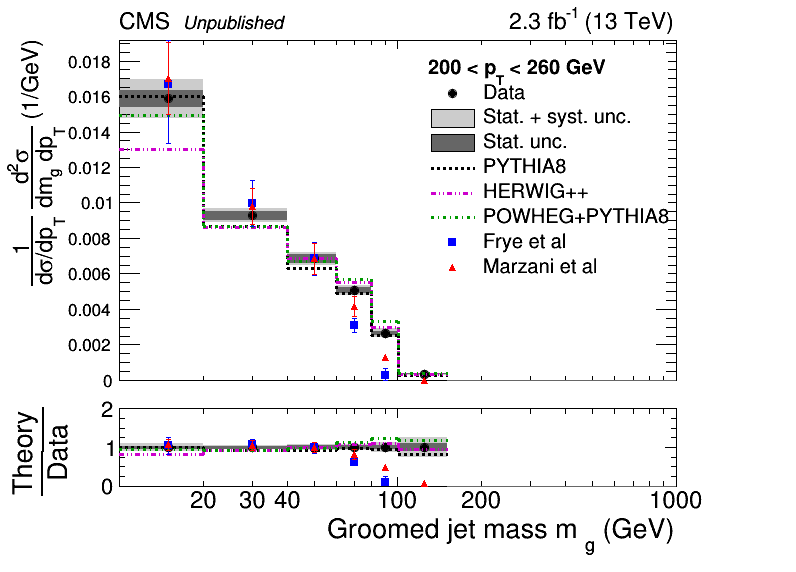

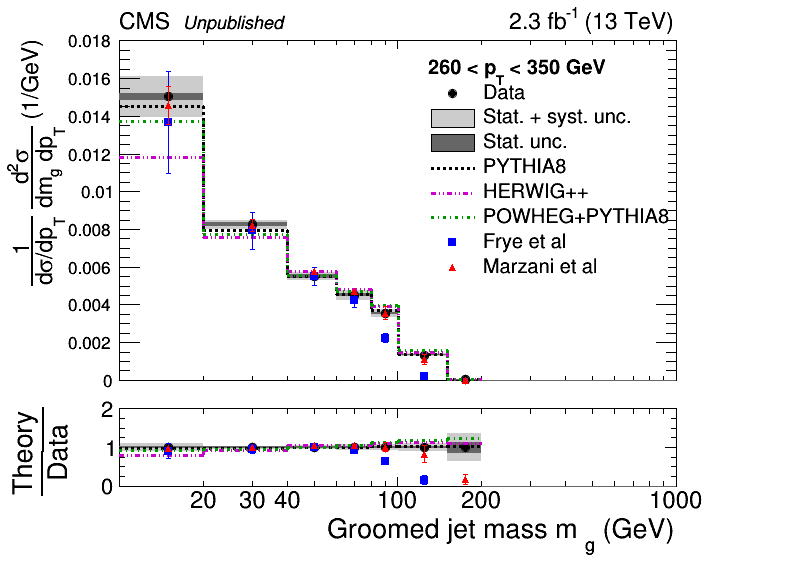

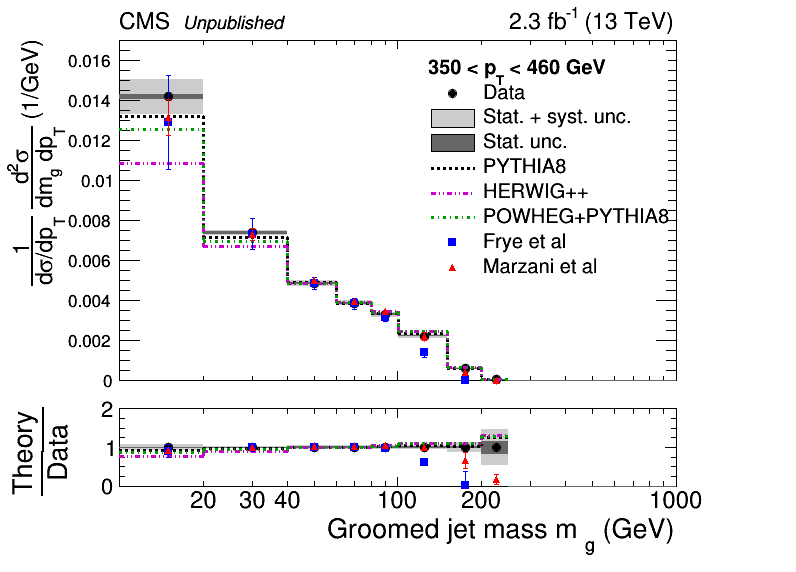

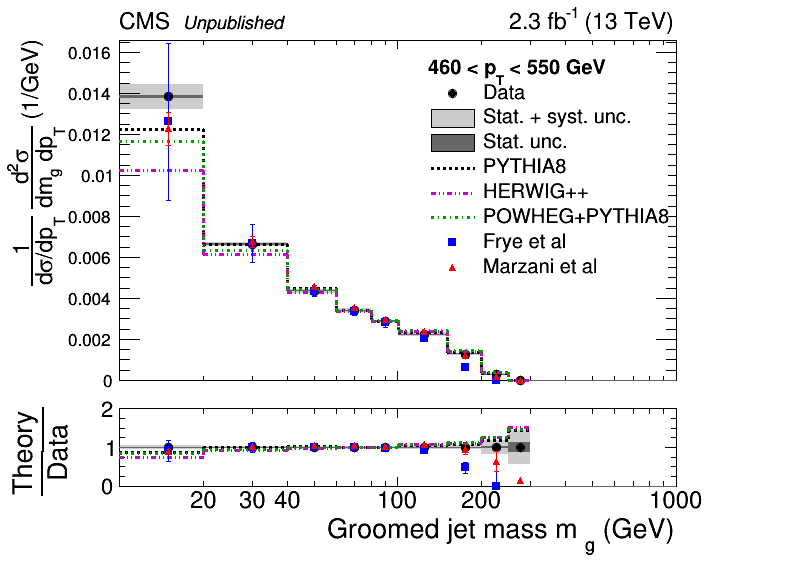

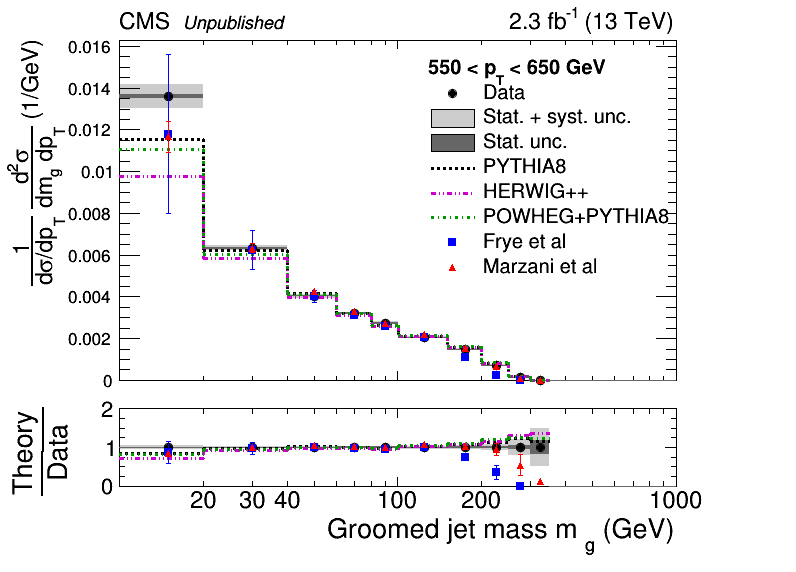

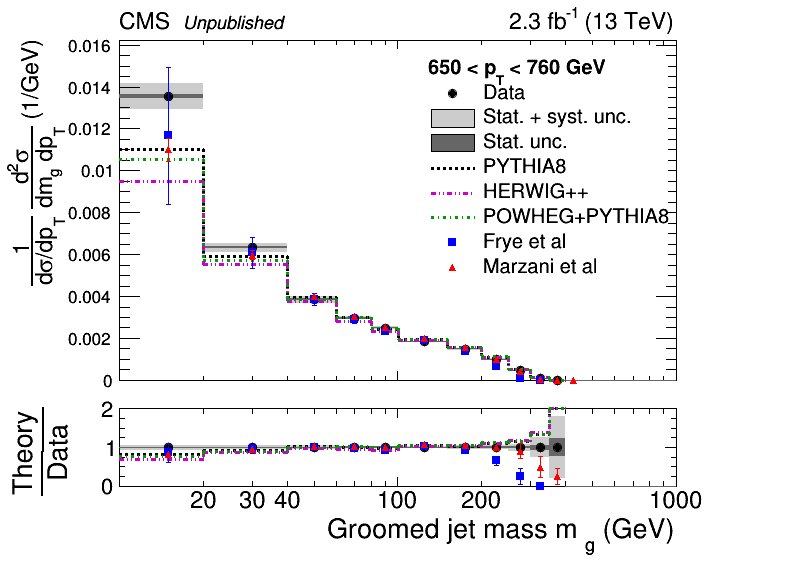

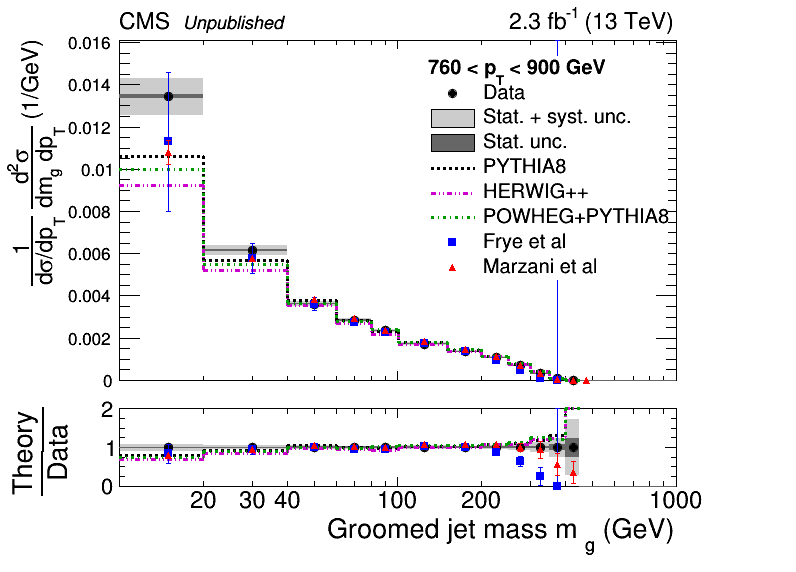

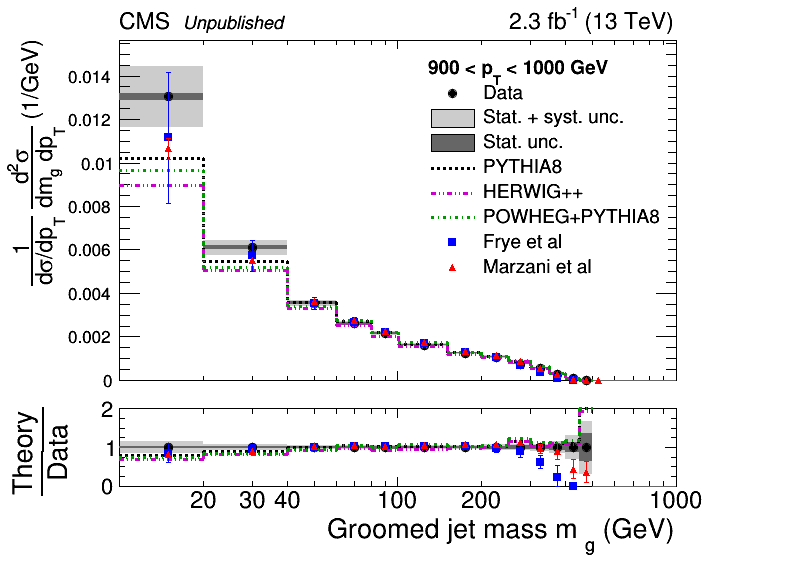

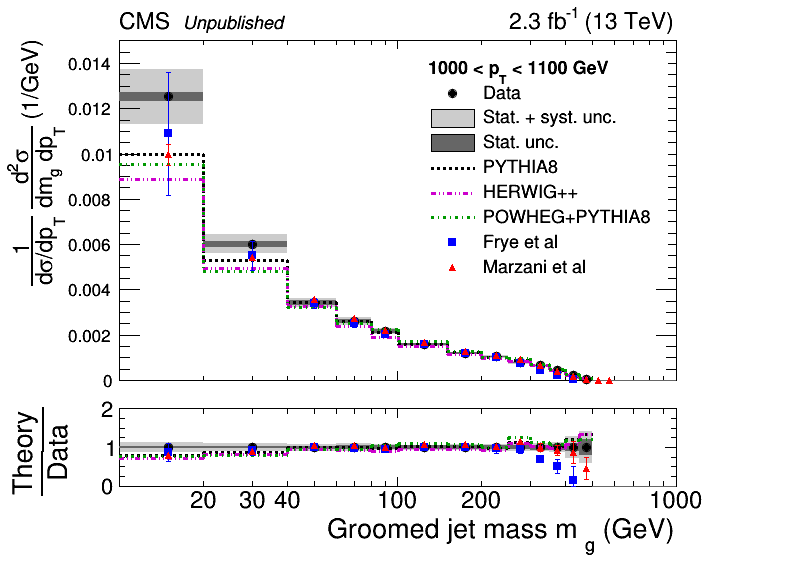

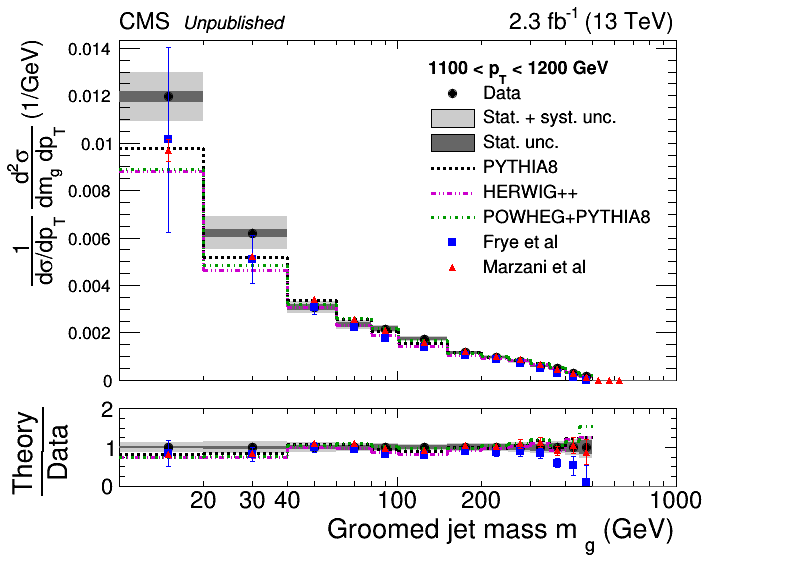

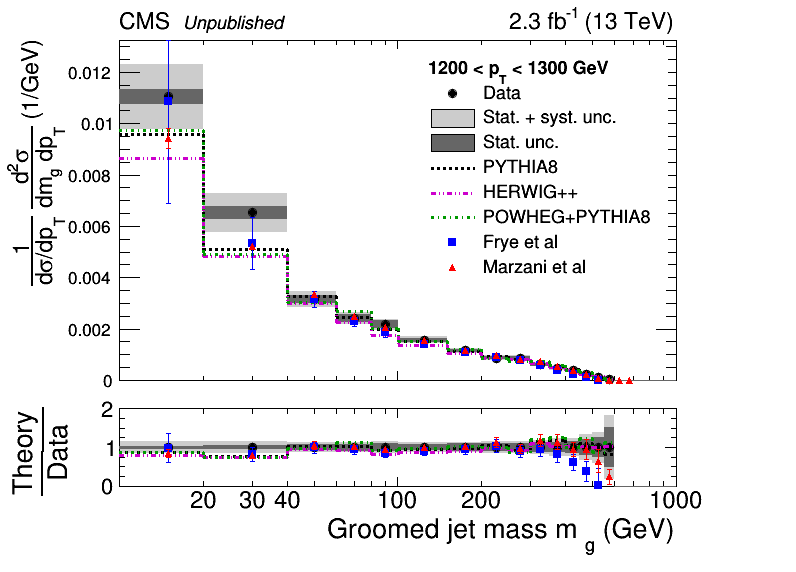

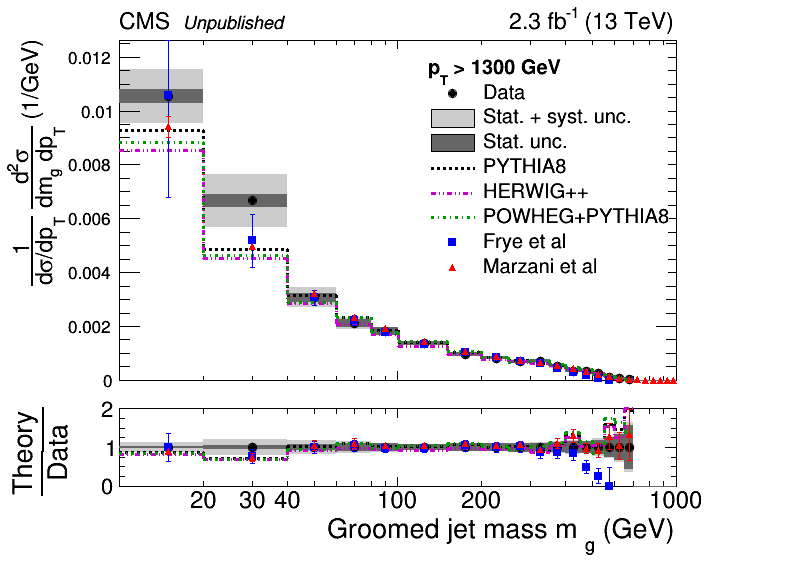

In [9]:

ug_norm = RooUnfoldUnfolder(useSoftDrop=True,
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root", 
                       theoryInputs1="theory_predictions.root", 
                       theoryInputs2="theory_predictions_marzani_newpred.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,
                       postfix="normalized_softdrop")

ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,
                                      ug_norm.pythiaHist,ug_norm.herwigHist,ug_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'],
                              theorycurves=['theory1', 'theory2']                            
                             )




Info in <TCanvas::Print>: png file fullxs_normalized_softdrop1_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop1_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop1_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop2_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop2_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop2_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop3_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalized_softdrop3_mdsigmadm.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file fullxs_normalized_softdrop3_mdsigmadm.root has been created
Info in <TCanvas::Print>: png file fullxs_normalized_softdrop4_mdsigmadm.png has been created
Info in <TCanvas::Print>: pdf file fullxs_normalize

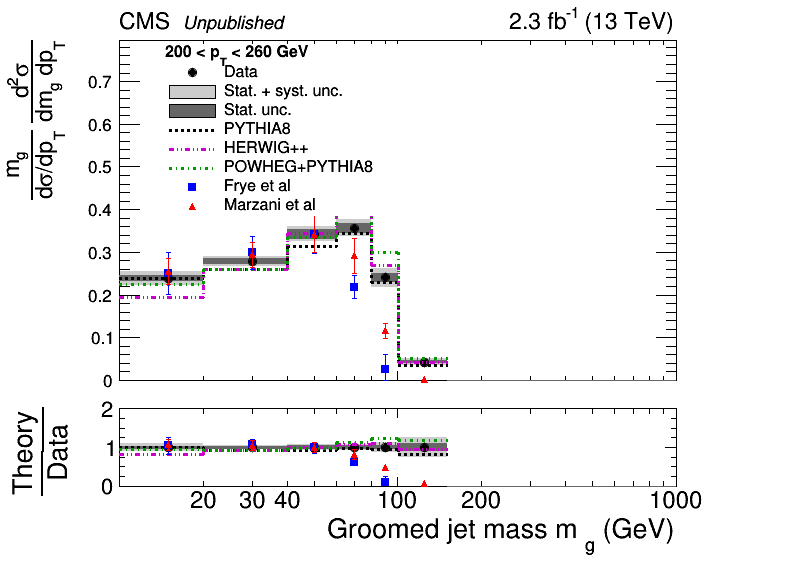

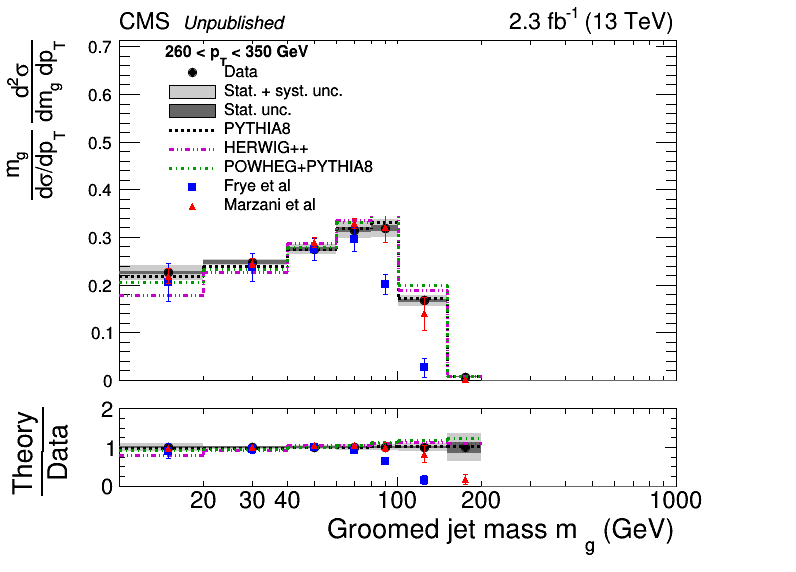

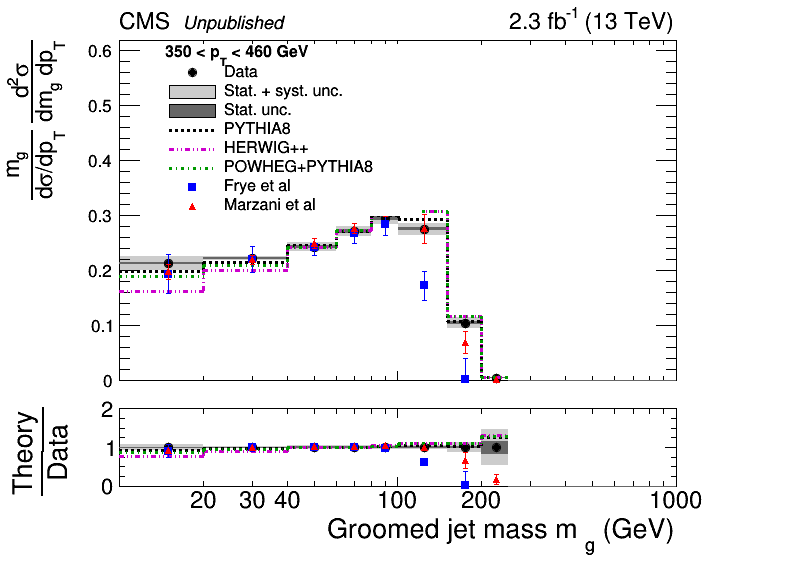

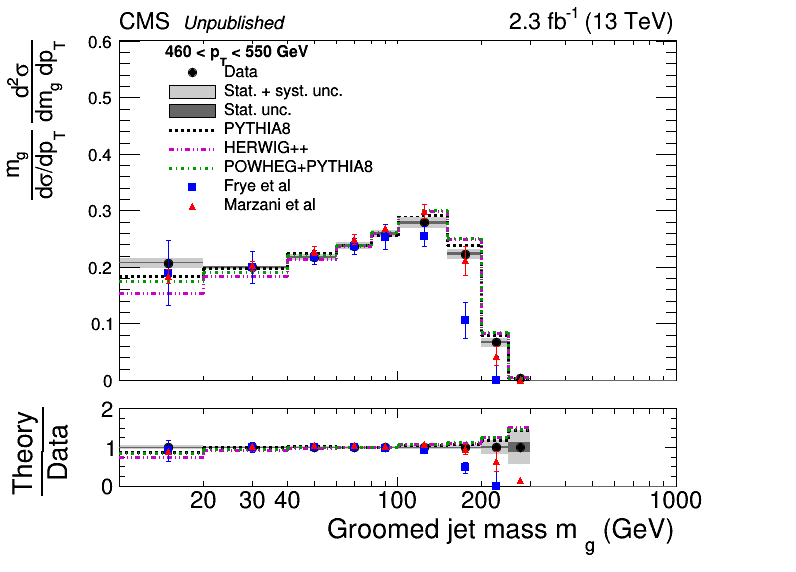

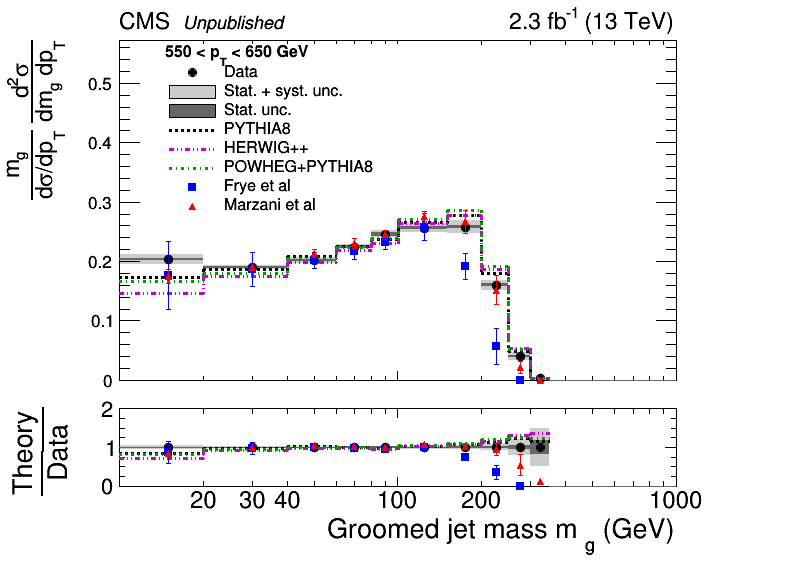

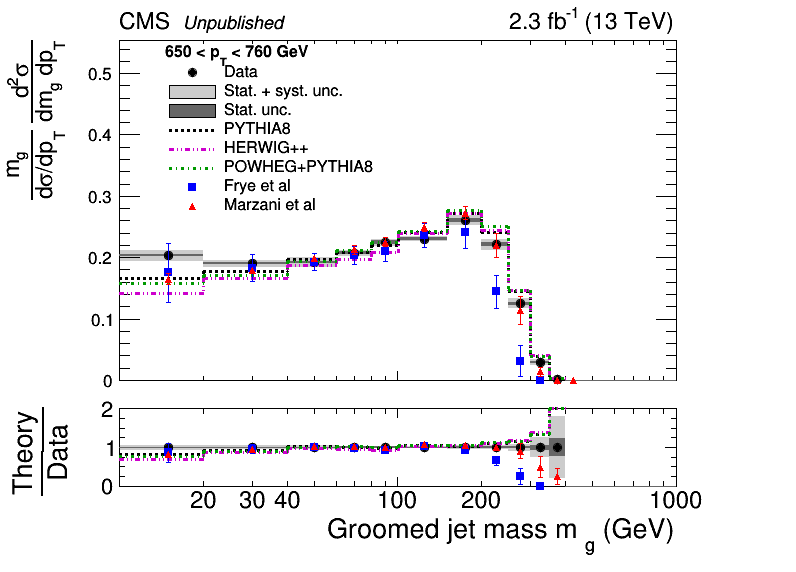

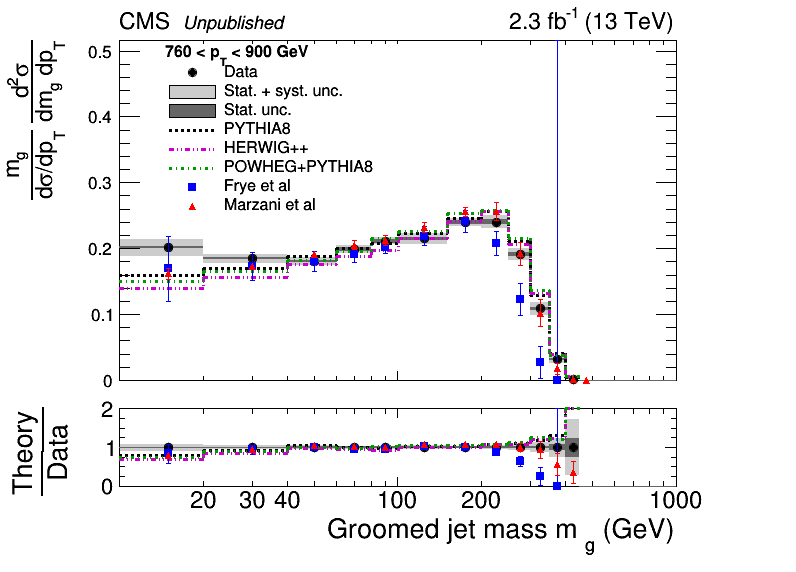

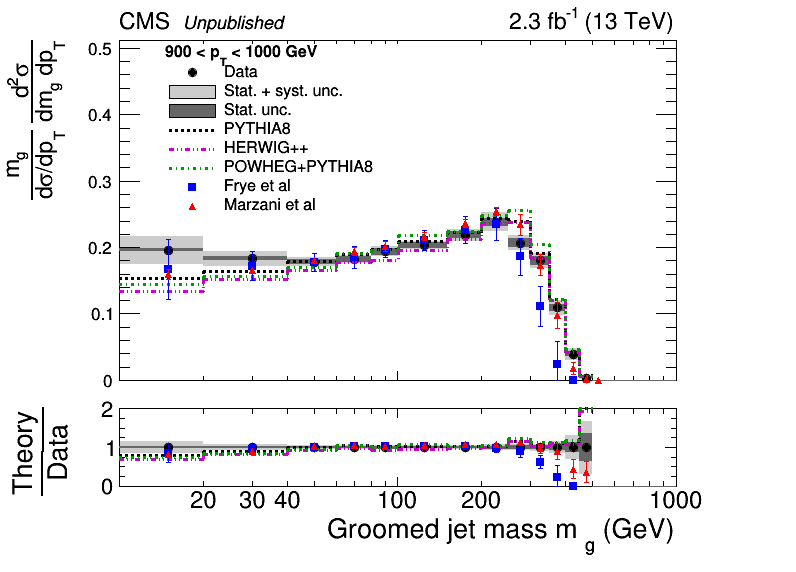

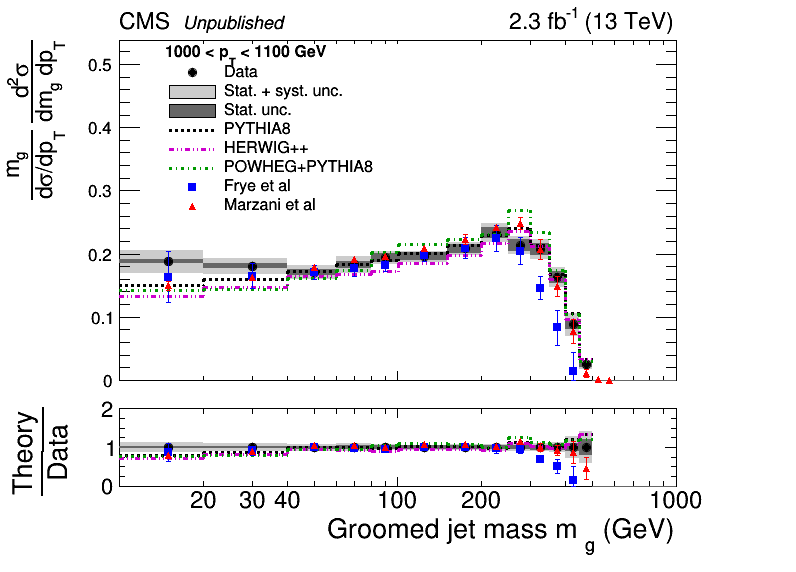

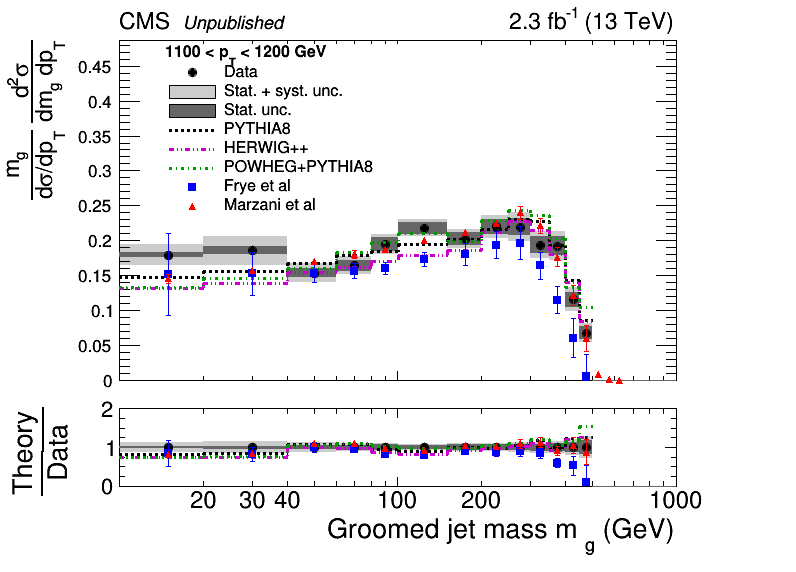

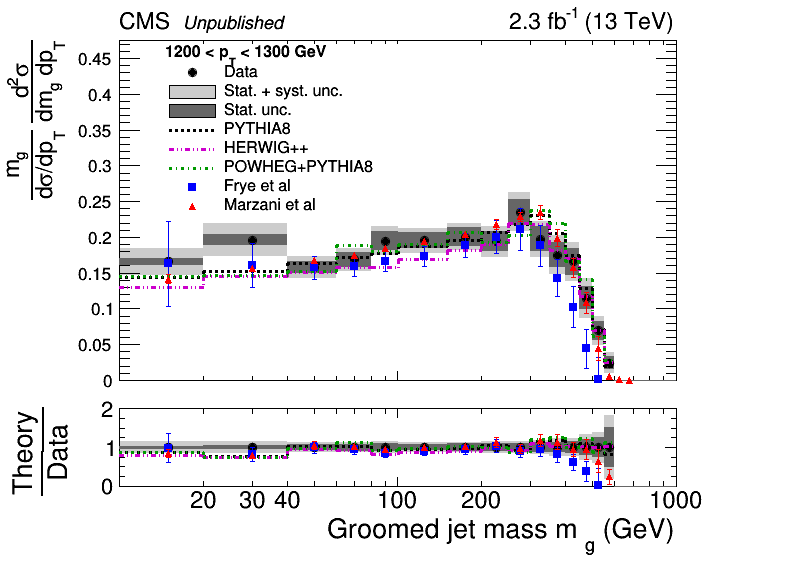

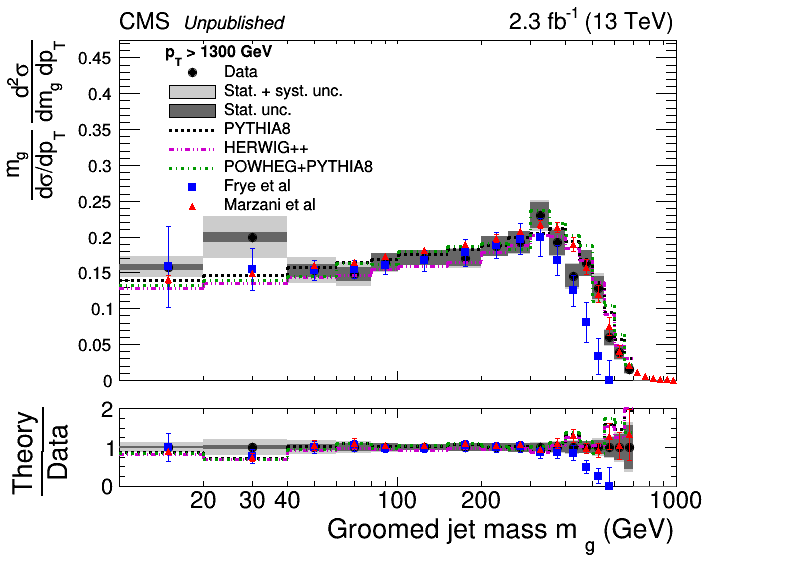

In [10]:


ug_norm.plotFullXSProjections( hists=[ug_norm.nom, ug_norm.nomStat,
                                      ug_norm.pythiaHist,ug_norm.herwigHist,ug_norm.powhegHist],
                              styleNames=['nom','nomStat','pythia','herwig','powheg'],
                              theorycurves=['theory1', 'theory2'],
                              plotlogm=True, legendpos="left"
                             )

#### Ungroomed uncertainties, normalized

{'_jec': <ROOT.TH2F object ("2d_response_jernom__jec") at 0x7fdbb1409e00>, '_pdf': <ROOT.TH2F object ("2d_response_nomnom_pdf") at 0x7fdbb2aefa00>, '_jmr': <ROOT.TH2F object ("2d_response_jmrnom__jmr") at 0x7fdbb299d400>, '_jms': <ROOT.TH2F object ("2d_response_jernom__jms") at 0x7fdbb1b14600>, '_pu': <ROOT.TH2F object ("2d_response_jernom__pu") at 0x7fdbb1b28c00>, '_mcStat': <ROOT.TH2F object ("2d_response_nomnom_mcStat") at 0x7fdbb159da00>, '_jer': <ROOT.TH2F object ("2d_response_jernom__jer") at 0x7fdbb2996600>, '_ps': <ROOT.TH2F object ("2d_response_nomnom_ps") at 0x7fdbb2acac00>, '_totunc': None}


Info in <TCanvas::Print>: png file uncertainties_ungroomed1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed1.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed2.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed3.root has been created
Info in <TCanvas::Print>: png file uncertainties_ungroomed4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_ungroomed4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_ungroomed4.root has been created
Info in <TCanvas

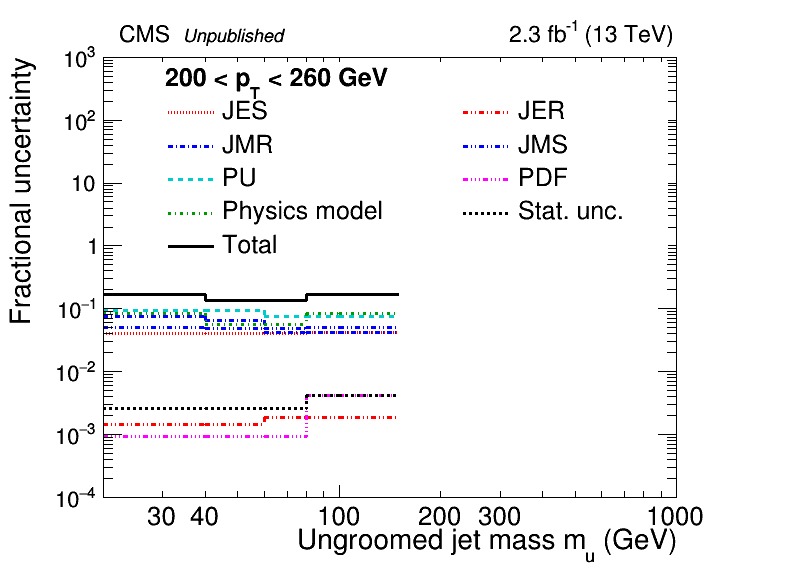

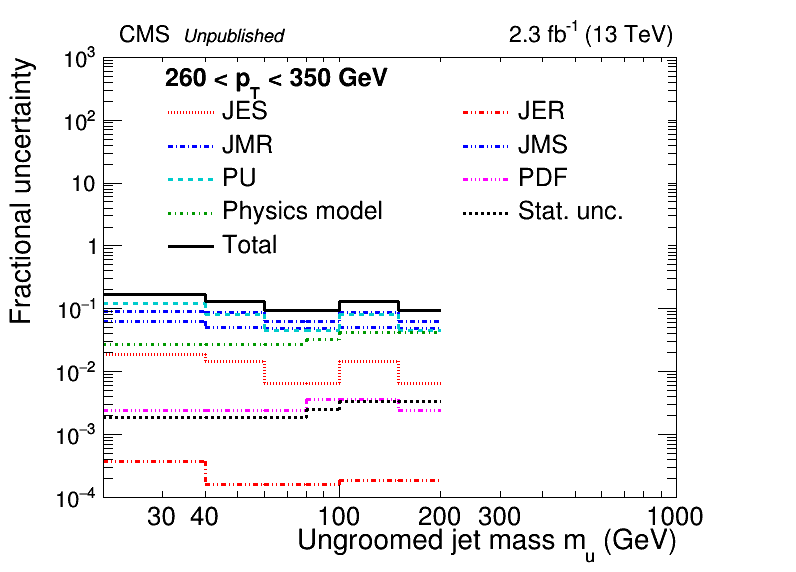

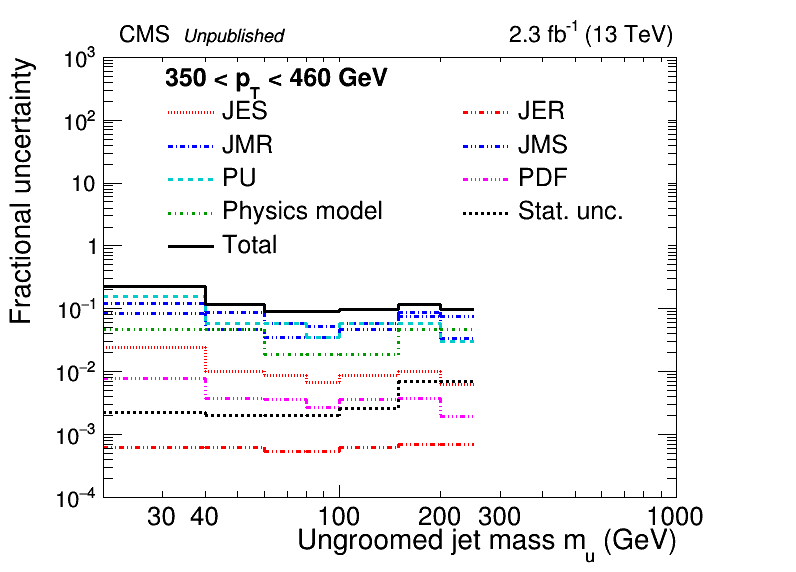

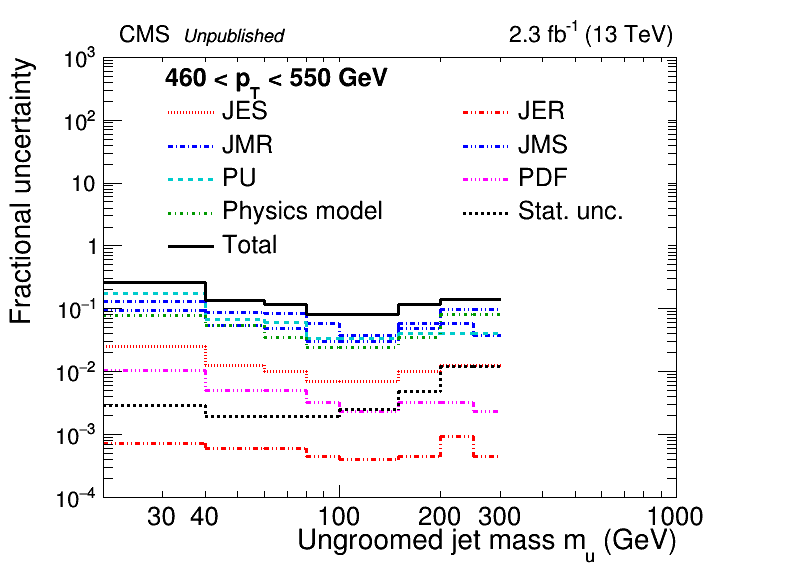

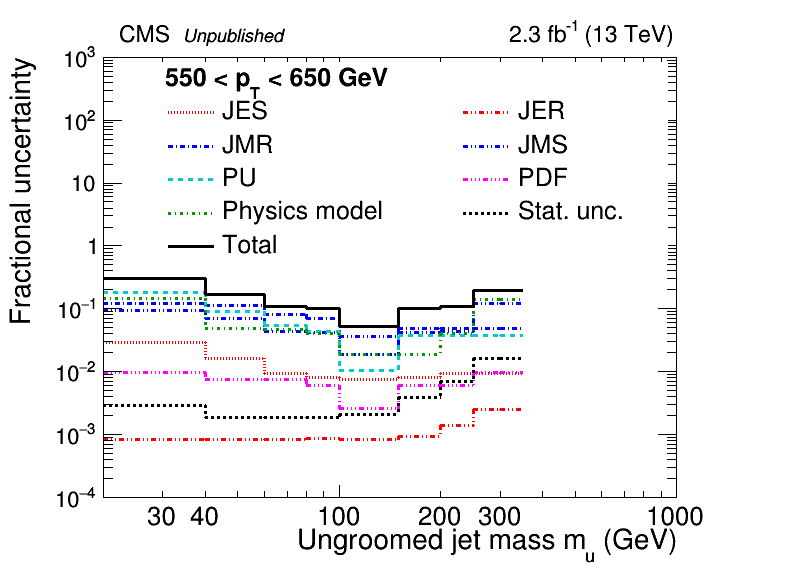

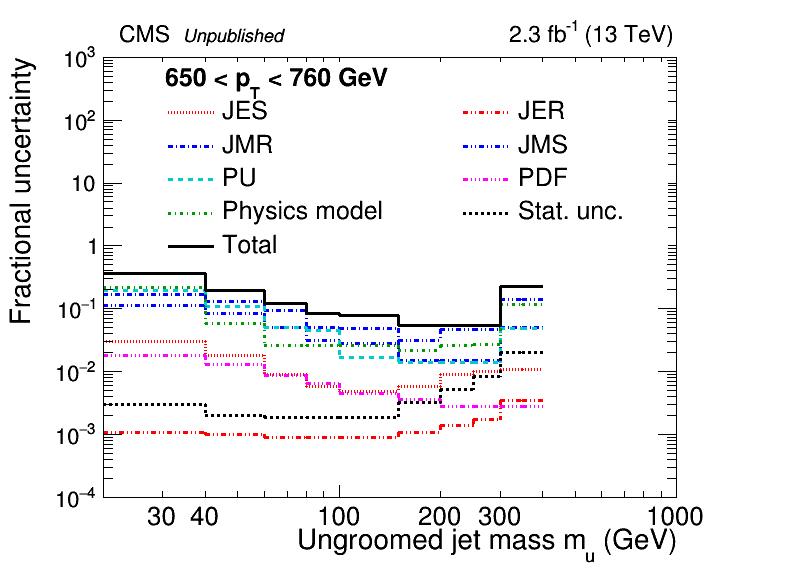

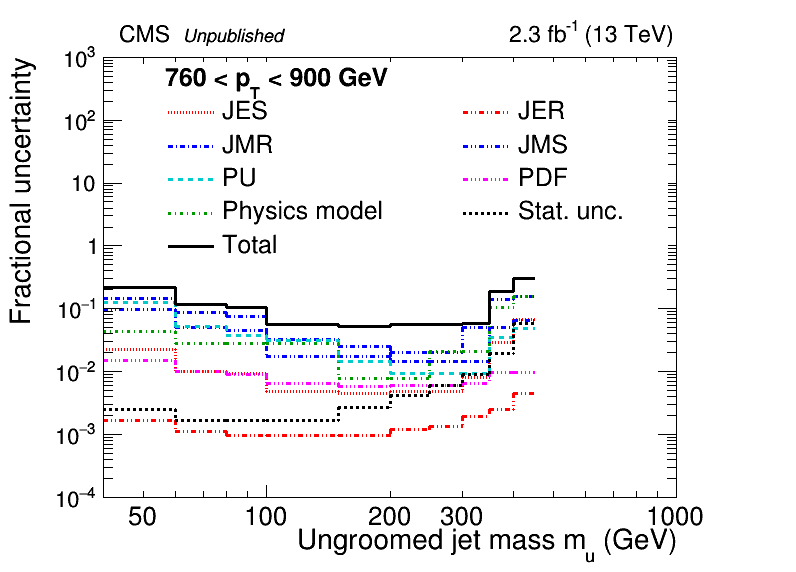

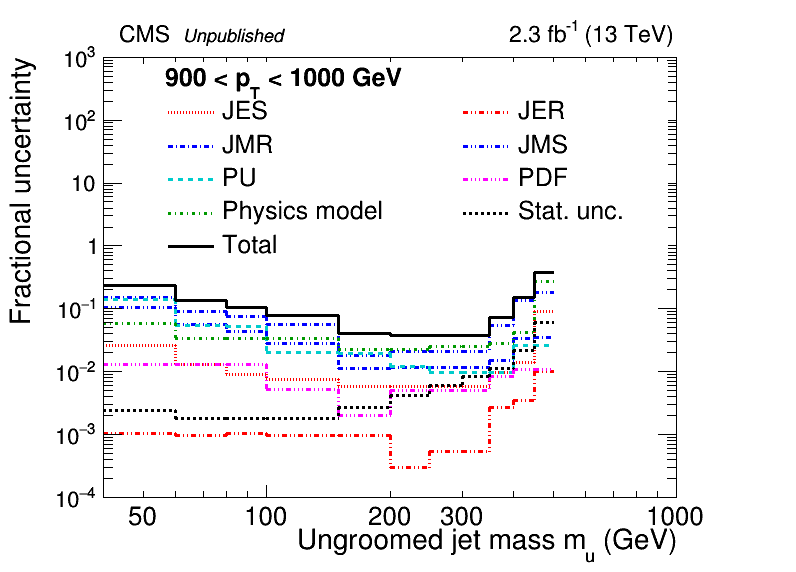

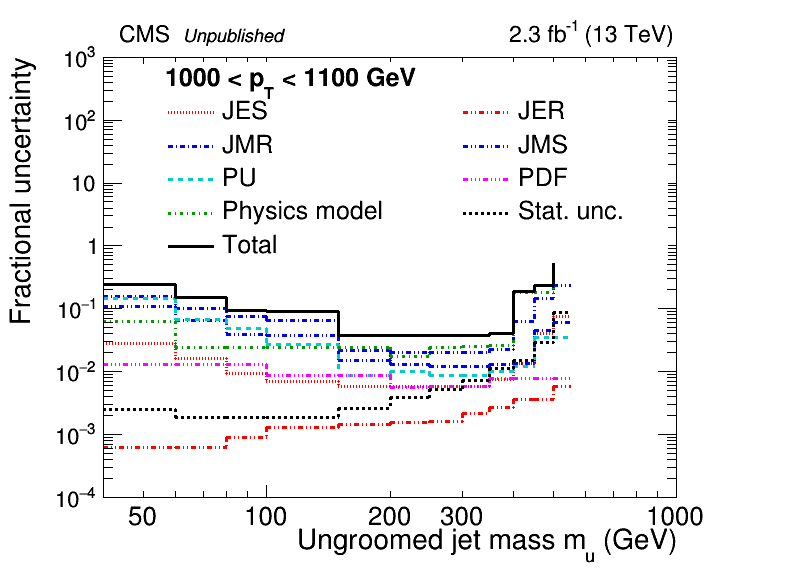

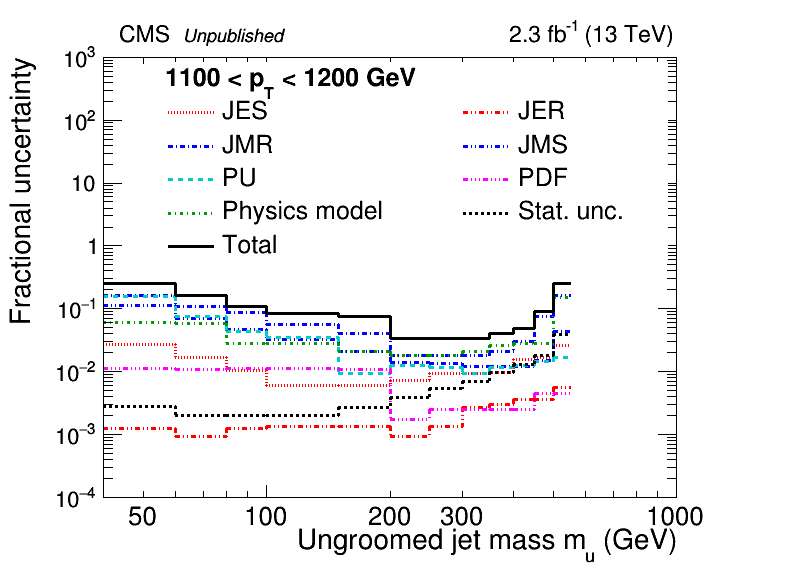

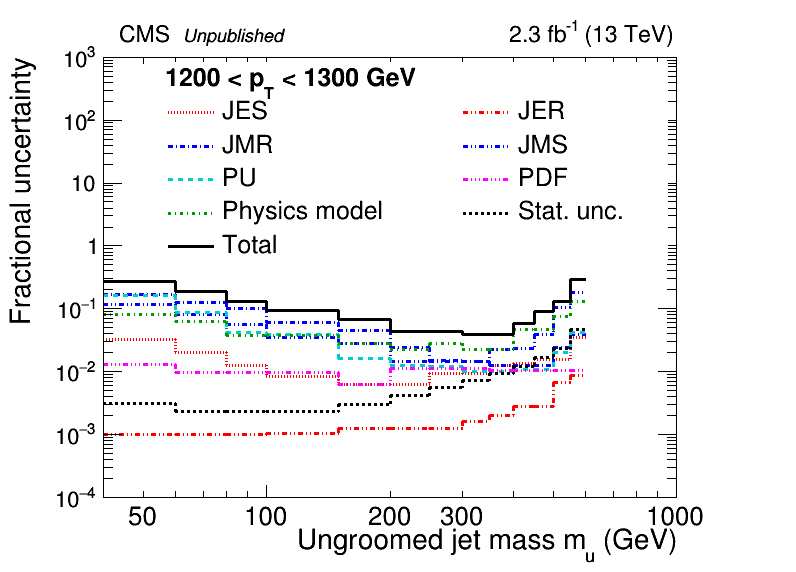

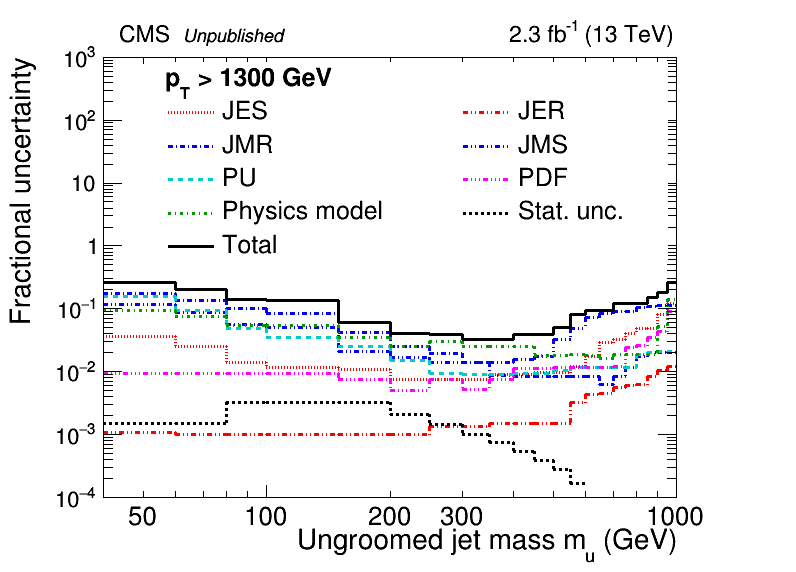

In [11]:


uumc_norm = RooUnfoldUnfolder(useSoftDrop=False, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi, postfix="ungroomed")


uumc_norm.plotFullUncs( hists=uumc_norm.uncertainties)



#### Groomed uncertainties, normalized

{'_jec': <ROOT.TH2F object ("2d_response_softdrop_jernom__jec") at 0x7fdbb1ca8a00>, '_pdf': <ROOT.TH2F object ("2d_response_softdrop_nomnom_pdf") at 0x7fdbb2c6c600>, '_jmr': <ROOT.TH2F object ("2d_response_softdrop_jmrnom__jmr") at 0x7fdbb319ea00>, '_jms': <ROOT.TH2F object ("2d_response_softdrop_jernom__jms") at 0x7fdbb2b4b200>, '_pu': <ROOT.TH2F object ("2d_response_softdrop_jernom__pu") at 0x7fdbb2b55800>, '_mcStat': <ROOT.TH2F object ("2d_response_softdrop_nomnom_mcStat") at 0x7fdbb2c77c00>, '_jer': <ROOT.TH2F object ("2d_response_softdrop_jernom__jer") at 0x7fdbb2b32a00>, '_ps': <ROOT.TH2F object ("2d_response_softdrop_nomnom_ps") at 0x7fdbb1e24000>, '_totunc': None}


Info in <TCanvas::Print>: png file uncertainties_softdrop1.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop1.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop1.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop2.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop2.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop2.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop3.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop3.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop3.root has been created
Info in <TCanvas::Print>: png file uncertainties_softdrop4.png has been created
Info in <TCanvas::Print>: pdf file uncertainties_softdrop4.pdf has been created
Info in <TCanvas::SaveAs>: ROOT file uncertainties_softdrop4.root has been created
Info in <TCanvas::Print>: pn

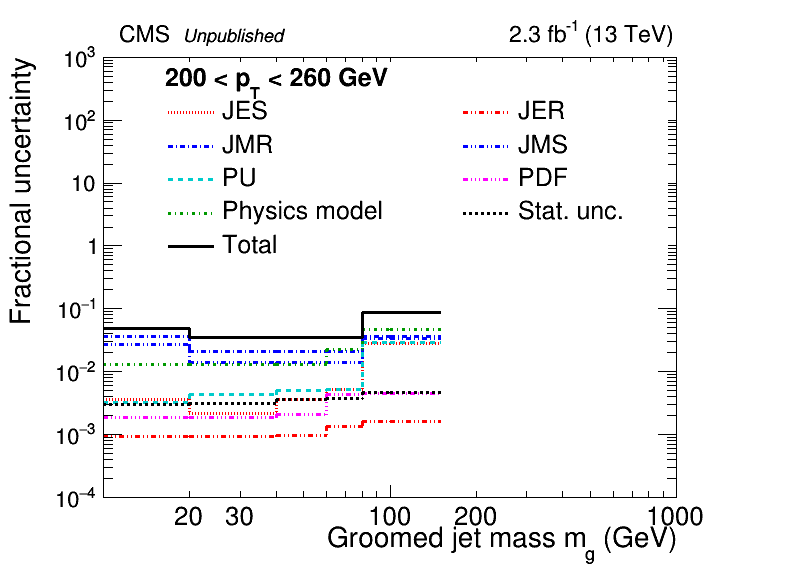

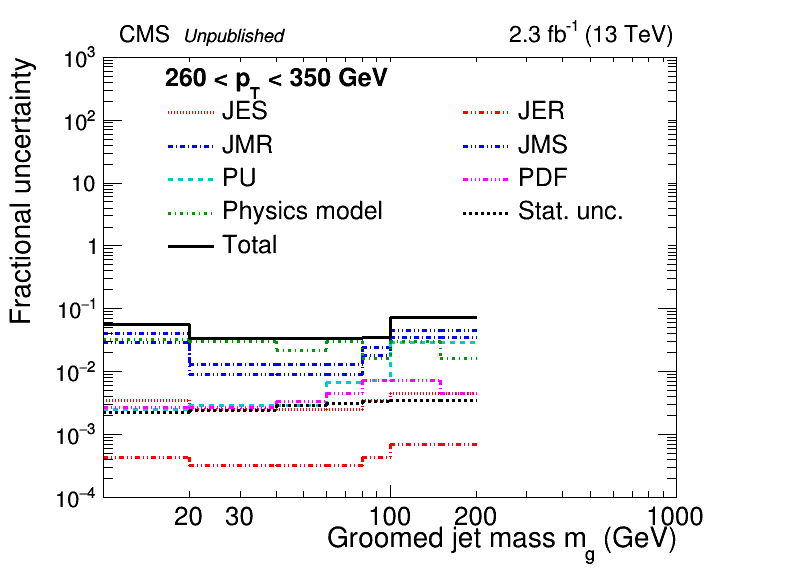

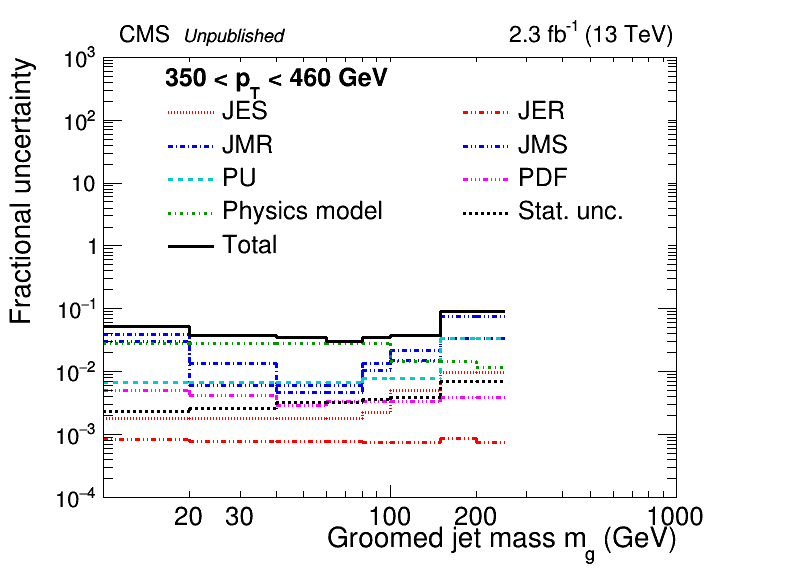

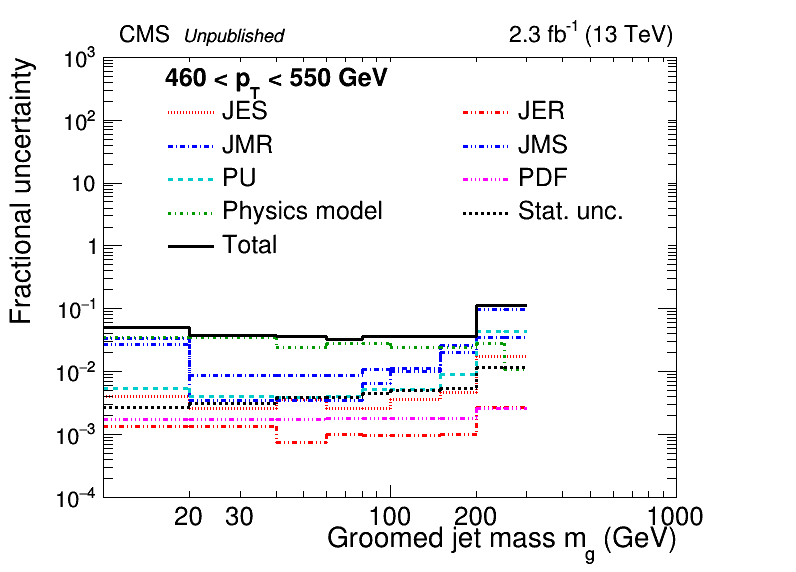

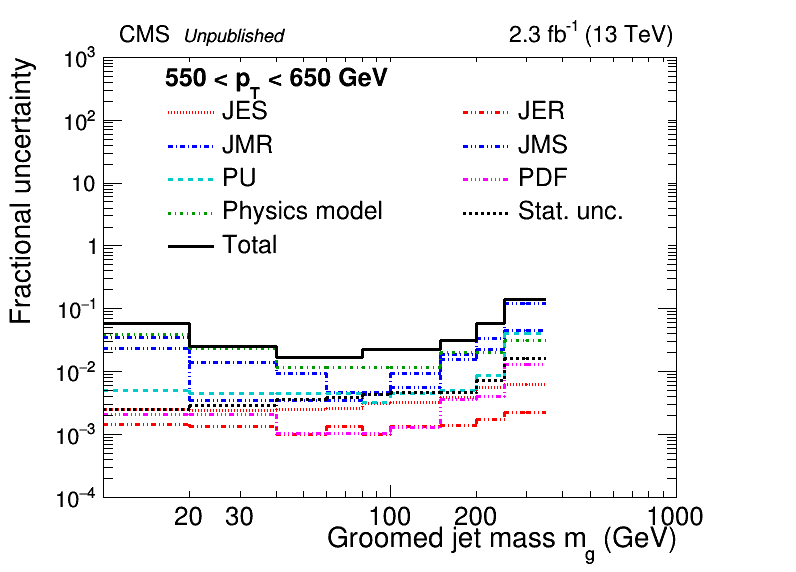

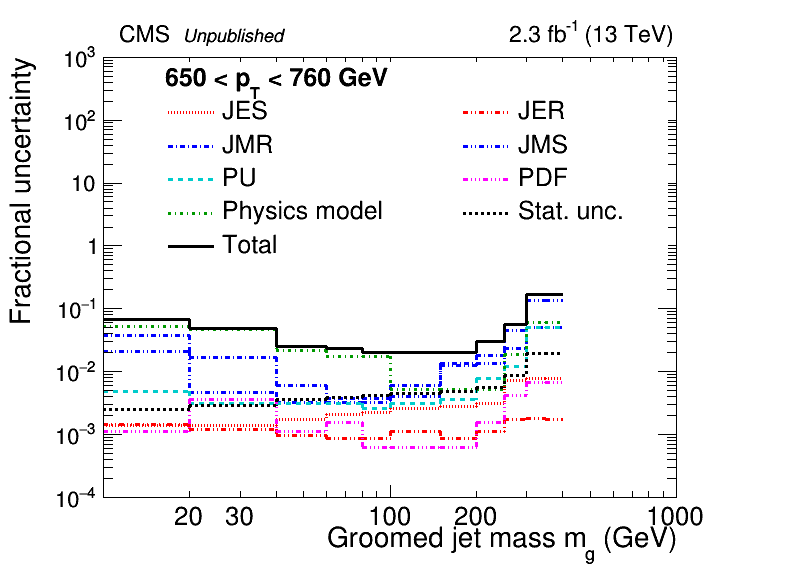

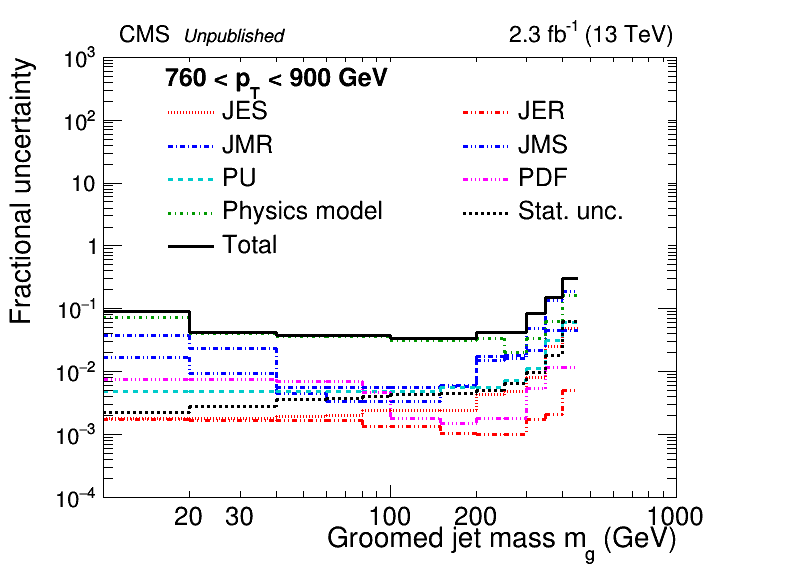

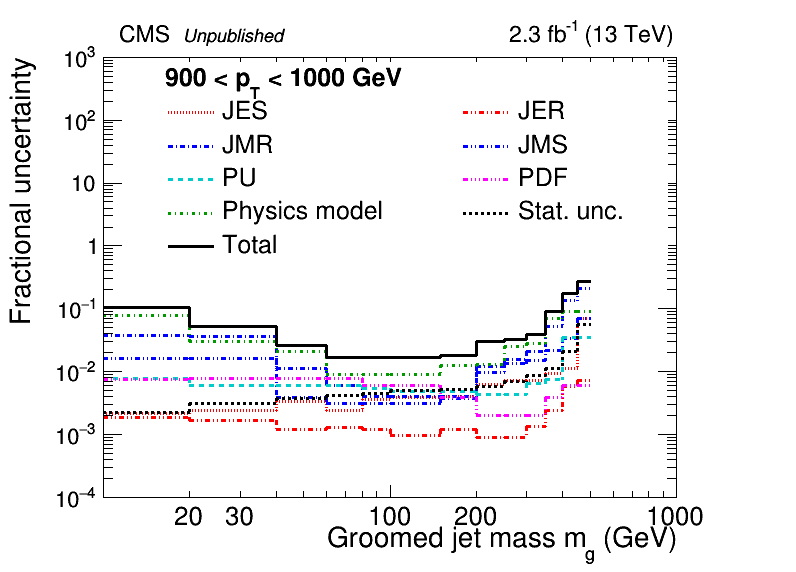

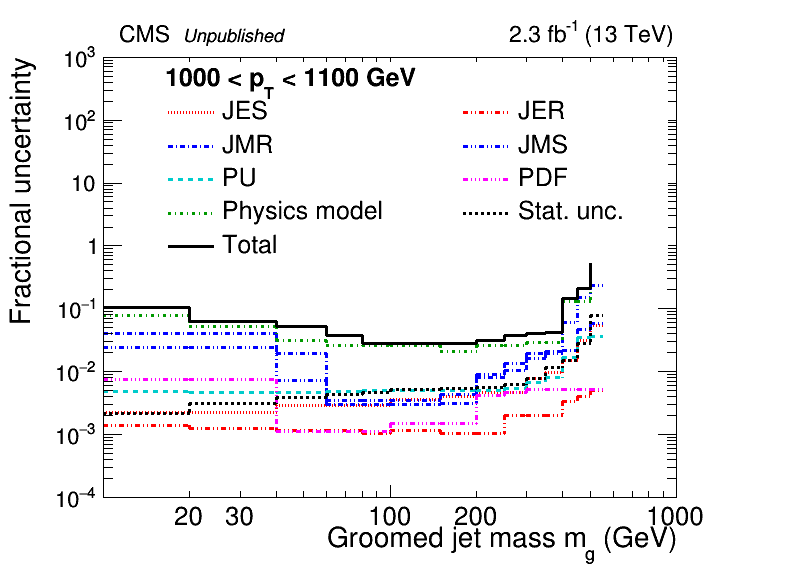

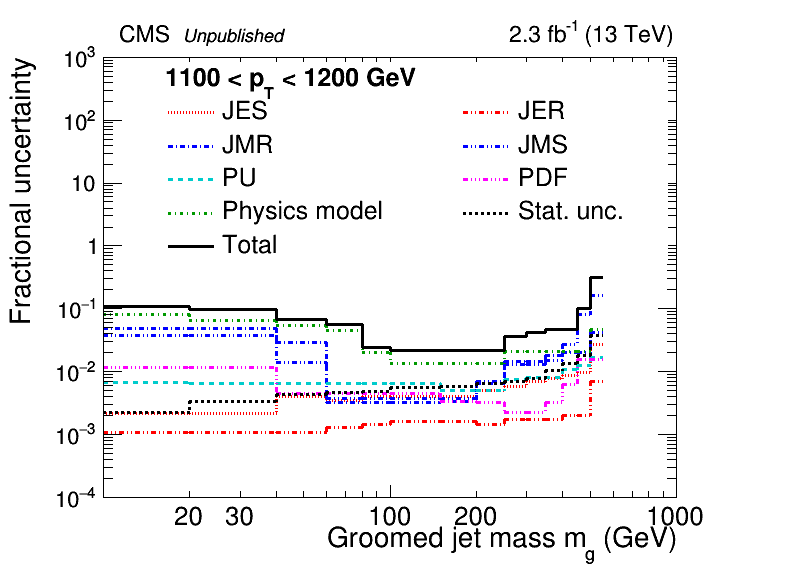

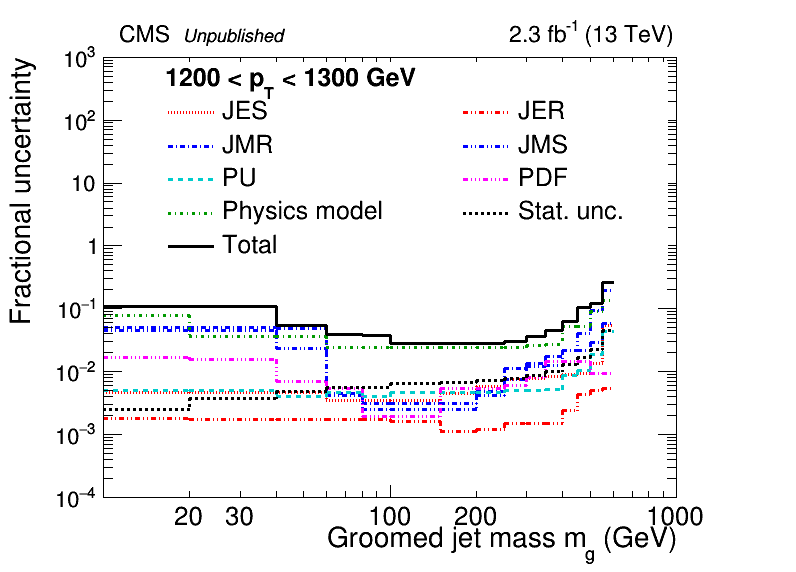

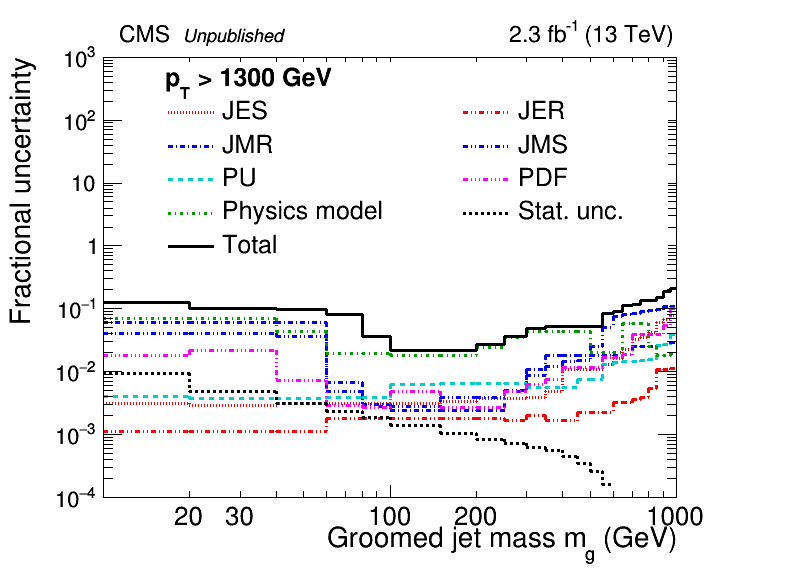

In [12]:

ugmc_norm = RooUnfoldUnfolder(useSoftDrop=True, inputs="2DClosure",
                       pythiaInputs=pythiafile,
                       herwigInputs=herwigfile,
                       powhegInputs="CMS_SMP_16_010.root",
                       normalizeUnity=True, scalePtBins=True, lumi=lumi,  postfix="softdrop")

ugmc_norm.plotFullUncs(hists=ugmc_norm.uncertainties)



In [13]:
ug.nomNorm / 2300.

47.437362458427266

In [14]:
ug_norm.nomNorm 

12799.999982019377

In [15]:
ug_norm.nom.Integral('width')

12777.041530536902